In [1]:
import numpy as np
# import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sn
# import theano 
# from theano import tensor as T

import sys
sys.path.append("../")
from global_utilities import LoT_indices_to_operators
from functions import *
import functions

In [2]:
from importlib import reload

In [3]:
try:
    # get minimal formulas length
    with open('../data/lengths_data.npy', 'rb') as openfile:
        lengths = np.load(openfile)
except FileNotFoundError:
    # get minimal formulas length
    with open(
            '/mnt/c/Users/faust/Documents/LoTNeuralNets/ANN_complexity/data/complete_lengths.npy', 
            'rb') as openfile:
        lengths = np.load(openfile)

In [4]:
NUM_PROPERTIES = 4
LoTs = LoT_indices_to_operators()

categories = np.array([
    [int(a) for a in f'{n:0{2**NUM_PROPERTIES}b}']
    for n in range(0, 2**(2**NUM_PROPERTIES))
])

datasize = 11
data = np.zeros(16, dtype=int)
data[np.random.randint(0, 16, size=datasize)] = 1

# Profile some functions

In [367]:
%load_ext line_profiler

In [14]:
import functions
from functions import *

In [64]:
%autoreload
%lprun \
-f run_simulation_log \
-f calculate_logp_accept_object_marginal \
-f calculate_logp_LoT_given_behaviour \
run_simulation_log(datasize=0, lengths_full=lengths, LoTs_full=LoTs.values, categories=categories, temp=3, n_participants=1)

C:\Users\faust\Dropbox\Amsterdam\LoT_project\bayesianAgents\functions.py:58: RuntimeWarning: divide by zero encountered in log
  array = np.log(categories[None]) + logp_category_given_data[:,:,None]


Timer unit: 1e-07 s

Total time: 29.891 s
File: C:\Users\faust\Dropbox\Amsterdam\LoT_project\bayesianAgents\functions.py
Function: calculate_logp_accept_object_marginal at line 28

Line #      Hits         Time  Per Hit   % Time  Line Contents
    28                                           def calculate_logp_accept_object_marginal(lengths, categories, data, temp=3):
    29                                               """
    30                                               Get marginal probability that the participant will accept each object
    31                                               as belonging to the unobserved category given each possible LoT.
    32                                               For each LoT, sum across categories:
    33                                               (p_category * indicator function of object for that category)
    34                                               """
    35                                               
    36         

In [131]:
%load_ext autoreload

Parameters are:

1. datasize 
    - (I dont think it makes sense to do it at the level of specific shown data)
    - Between 0 and 15 (included)
    - Could give a few different values, e.g. 0, 1, 5, 10, 15
2. n_participants
    - 1 or greater
    - Within realistic numbers, say up to 1k participants?
    - Could give a few values for participant parameter, e.g. 1, 5, 10, 30, 60, 120, 250, 500, 1000
3. temp
    - Greater than 0
    - Could give a few values, like 0.5, 1, 3, 6
4. index of true LoT
    - Takes on 306 values (one for every distinguishable LoT)
5. Repetitions with same parameter combo
    - Also called "number of experiments"
    - I am interested in the measures aggregated across experiments
    - I can just fix it to a value, e.g. 10

In [229]:
results = run_simulation_log(
    datasize=4, 
    n_participants=10,
    lengths_full=lengths, 
    LoTs_full=LoTs.values, 
    categories=categories, 
    temp=3, 
    true_LoT=LoTs.iloc[20].values[None], 
#     data=data
)

<ipython-input-228-f4303b3b26b7>:35: RuntimeWarning: divide by zero encountered in log
  array = np.log(categories[None]) + logp_category_given_data[:,:,None]
<ipython-input-228-f4303b3b26b7>:58: RuntimeWarning: invalid value encountered in log
  np.log(-np.expm1(logp_accept_object_marginal))


<BarContainer object of 512 artists>

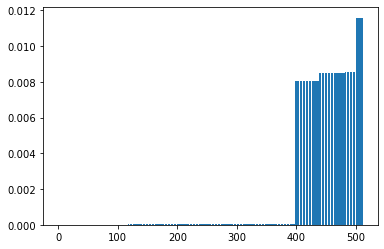

In [461]:
plt.bar(x=np.arange(len(results[1])), height=np.sort(np.exp(results[1])))

In [70]:
for i in np.argsort(np.exp(results[1])):
    print(i, np.exp(results[1])[i])

0 0.0
156 0.0
158 0.0
160 0.0
168 0.0
176 0.0
184 0.0
154 0.0
385 0.0
192 0.0
194 0.0
196 0.0
198 0.0
200 0.0
202 0.0
474 0.0
152 0.0
150 0.0
148 0.0
80 0.0
88 0.0
90 0.0
128 0.0
129 0.0
130 0.0
132 0.0
134 0.0
136 0.0
137 0.0
138 0.0
140 0.0
142 0.0
144 0.0
146 0.0
204 0.0
206 0.0
208 0.0
210 0.0
440 0.0
432 0.0
304 0.0
424 0.0
312 0.0
416 0.0
410 0.0
408 0.0
400 0.0
398 0.0
396 0.0
394 0.0
393 0.0
392 0.0
386 0.0
450 0.0
78 0.0
296 0.0
456 0.0
212 0.0
214 0.0
216 0.0
218 0.0
220 0.0
222 0.0
256 0.0
257 0.0
462 0.0
264 0.0
265 0.0
460 0.0
272 0.0
280 0.0
458 0.0
288 0.0
76 0.0
384 0.0
74 0.0
1 0.0
14 0.0
32 0.0
40 0.0
16 0.0
12 0.0
66 0.0
64 0.0
10 0.0
9 0.0
2 0.0
8 0.0
26 0.0
24 0.0
72 0.0
48 0.0
56 0.0
18 6.034077119449286e-08
4 1.192382867059653e-07
82 1.3583899255060286e-07
68 2.4282706950351637e-07
133 1.8333011163710817e-06
197 1.8333011163710817e-06
5 2.0168832224579577e-06
69 2.0168832224579577e-06
17 5.8971164297336475e-06
141 2.9815264934895984e-05
205 2.9815264934895984e-05

# Analyze multiple runs

## Recover equivalent languages

How has the number of LoTs been reduced?
1. Inverted conditional and negated inverted conditional were disregarded since I have minimal formulas for languages with conditionals and negated conditionals
2. LoTs that are equivalent up to the following operator-wise mapping (see ```calculate_all_inventories``` in ```utilities``` in ```booleanMinimization```) were excluded:
        'O': 'A',
        'A': 'O',
        'N': 'N',
        'C': 'NIC',
        'B': 'X',
        'X': 'B',
        'NA': 'NOR',
        'NOR': 'NA',
        'NC': 'IC',
These two initial steps reduced to 
- Finally, once the minimal formulas were calculated for these languages, I reduced the LoTs to the unique combinations of 

All operators:
- O, A, C, B, X, NA, NOR, NC, IC, NIC, and the propositions: are in the considered LoTs
- T, F, the negated propositions: are not in the considered LoTs

About the reduction of the number of LoTs:
- What happened is basically that when I was calculating the inventories in booleanMinimization subproject I excluded IC and NIC because they are always equivalent (in terms of the minimal formulas they produce) to languages with C and NC respectively.
    - Obviously having one or having the other does not matter
    - But also crucially, having both is no better than having just one of them (unlike, say, dual operators)
    - This means that we can just exclude one
- Moreover, I excluded dual systems, i.e. systems that can be transformed into each other by substituting each operator with its dual. 
    - The dual of C is NIC (which was excluded) and the dual of NC is IC (which was excluded). 
    - But a system with NIC is always equivalent to a system with NC, and same for IC and C!
    - Therefore, from the point of view of minimal formulas C and NC _effectively_ also work as duals of each other.
    - Therefore, I only need the languages with C and with C+NC (or alternatively with NC and with C+NC), but not languages with just NC (Here, having both is different from having just one of them!).
    - NOTE: dual LoTs do not have the same formulas lengths for _the same categories_, but rather for _dual_ categories
    - Where dual category means that category that is obtained by flipping and negating the binary string corresponding to the category (which in terms of object means 
- When I was finding the minimal formulas, and therefore I considered all languages with C, with NC, and with C+NC

- When doing the simulation with the Bayesian agents, I cannot assume that dual LoTs are equivalent, because True and False are not equivalent anymore.
- The likelihood depends on the size of the category. But the sizes of two dual categories are in general not the same. For instance, the all-0 category and the all-1 category are duals, but their sizes are as different as it can be. 
- Therefore, the Bayesian model needs to be run on ALL LoTs
    - well, after eliminating those that are equivalent for all categories, which are going to be e.g. those for which it makes no difference whether they have or not the negation.
    - In those cases, just exclude the LoT with redundant operators
    - CHECK if there are cases where there are two *directly* equivalent LoTs (i.e. NOT dually equivalent, but equivalent for the very same categories) of the same size. In such cases, consider them as equally probable options that are underdetermined by the data.
    - (this is also an interesting case to discuss because it is a different sense of indistinguishability than Feldman's duality sense)
- Once I run the Bayesian model on the whole space of LoTs, I can actually think directly in terms of operators rather than in terms of elements of the quotient set (the partition based on the equivalence class)

The lengths array contains the minimal formulas for some categories, and -1 for other categories. In theory, I wanted to only calculate the minimal formulas for non-redundant LoTs (i.e. for each couple of dual LoTs, only calculate one of them). But because I didn't notice the whole C and NC being dual thing, I calculated the minimal formulas for more arrays than was required. Now check that the results are consistent, i.e. that for any two dual LoTs, the minimal formulas for the corresponding dual categories are equivalent.

In [354]:
same = []
for row_index in np.arange(len(lengths)):
    equiv_LoT = expand_with_equivalent_LoTs(LoTs.iloc[row_index:row_index+1])
    index_equivalent = np.argwhere(np.all(LoTs.values==equiv_LoT.values, axis=1))[0][0]
    if (lengths[row_index,0]!=-1) and (row_index != index_equivalent):
        display(LoTs.iloc[[row_index, index_equivalent]])
        print(lengths[row_index,0], lengths[index_equivalent,0], "\n")
#         if lengths[index_equivalent,0] != -1:
#             same.append(np.all(lengths[index_equivalent]==lengths[row_index][index_to_dual]))
np.all(same)

O      A      N      C      B      X     NA    NOR     NC
2  False  False  False  False  False  False  False   True  False
4  False  False  False  False  False  False   True  False  False

2 5 



O      A      N      C      B      X     NA    NOR     NC
3   False  False  False  False  False  False  False   True   True
36  False  False  False   True  False  False   True  False  False

1 3 



O      A      N      C      B      X     NA    NOR     NC
4  False  False  False  False  False  False   True  False  False
2  False  False  False  False  False  False  False   True  False

5 2 



O      A      N      C      B      X     NA    NOR     NC
5   False  False  False  False  False  False   True  False   True
34  False  False  False   True  False  False  False   True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
7   False  False  False  False  False  False  True  True   True
38  False  False  False   True  False  False  True  True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
10  False  False  False  False  False   True  False   True  False
20  False  False  False  False   True  False   True  False  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
11  False  False  False  False  False   True  False   True   True
52  False  False  False   True   True  False   True  False  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
12  False  False  False  False  False   True   True  False  False
18  False  False  False  False   True  False  False   True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
13  False  False  False  False  False   True   True  False   True
50  False  False  False   True   True  False  False   True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
14  False  False  False  False  False   True  True  True  False
22  False  False  False  False   True  False  True  True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
15  False  False  False  False  False   True  True  True   True
54  False  False  False   True   True  False  True  True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
17  False  False  False  False   True  False  False  False   True
40  False  False  False   True  False   True  False  False  False

1 1 



O      A      N      C      B      X     NA    NOR     NC
18  False  False  False  False   True  False  False   True  False
12  False  False  False  False  False   True   True  False  False

2 1 



O      A      N      C      B      X     NA    NOR     NC
19  False  False  False  False   True  False  False   True   True
44  False  False  False   True  False   True   True  False  False

1 1 



O      A      N      C      B      X     NA    NOR     NC
20  False  False  False  False   True  False   True  False  False
10  False  False  False  False  False   True  False   True  False

2 1 



O      A      N      C      B      X     NA    NOR     NC
21  False  False  False  False   True  False   True  False   True
42  False  False  False   True  False   True  False   True  False

1 1 



O      A      N      C      B      X    NA   NOR     NC
22  False  False  False  False   True  False  True  True  False
14  False  False  False  False  False   True  True  True  False

2 1 



O      A      N      C      B      X    NA   NOR     NC
23  False  False  False  False   True  False  True  True   True
46  False  False  False   True  False   True  True  True  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
25  False  False  False  False  True  True  False  False   True
56  False  False  False   True  True  True  False  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
26  False  False  False  False  True  True  False   True  False
28  False  False  False  False  True  True   True  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
27  False  False  False  False  True  True  False   True   True
60  False  False  False   True  True  True   True  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
28  False  False  False  False  True  True   True  False  False
26  False  False  False  False  True  True  False   True  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
29  False  False  False  False  True  True   True  False   True
58  False  False  False   True  True  True  False   True  False

1 1 



O      A      N      C     B     X    NA   NOR     NC
31  False  False  False  False  True  True  True  True   True
62  False  False  False   True  True  True  True  True  False

1 1 



O      A      N      C      B      X     NA    NOR     NC
34  False  False  False   True  False  False  False   True  False
5   False  False  False  False  False  False   True  False   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
35  False  False  False  True  False  False  False   True  True
37  False  False  False  True  False  False   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
36  False  False  False   True  False  False   True  False  False
3   False  False  False  False  False  False  False   True   True

3 1 



O      A      N     C      B      X     NA    NOR    NC
37  False  False  False  True  False  False   True  False  True
35  False  False  False  True  False  False  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
38  False  False  False   True  False  False  True  True  False
7   False  False  False  False  False  False  True  True   True

2 1 



O      A      N      C      B      X     NA    NOR     NC
40  False  False  False   True  False   True  False  False  False
17  False  False  False  False   True  False  False  False   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
41  False  False  False  True  False   True  False  False  True
49  False  False  False  True   True  False  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
42  False  False  False   True  False   True  False   True  False
21  False  False  False  False   True  False   True  False   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
43  False  False  False  True  False   True  False   True  True
53  False  False  False  True   True  False   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
44  False  False  False   True  False   True   True  False  False
19  False  False  False  False   True  False  False   True   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
45  False  False  False  True  False   True   True  False  True
51  False  False  False  True   True  False  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
46  False  False  False   True  False   True  True  True  False
23  False  False  False  False   True  False  True  True   True

1 1 



O      A      N     C      B      X    NA   NOR    NC
47  False  False  False  True  False   True  True  True  True
55  False  False  False  True   True  False  True  True  True

1 1 



O      A      N     C      B      X     NA    NOR    NC
49  False  False  False  True   True  False  False  False  True
41  False  False  False  True  False   True  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
50  False  False  False   True   True  False  False   True  False
13  False  False  False  False  False   True   True  False   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
51  False  False  False  True   True  False  False   True  True
45  False  False  False  True  False   True   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
52  False  False  False   True   True  False   True  False  False
11  False  False  False  False  False   True  False   True   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
53  False  False  False  True   True  False   True  False  True
43  False  False  False  True  False   True  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
54  False  False  False   True   True  False  True  True  False
15  False  False  False  False  False   True  True  True   True

2 1 



O      A      N     C      B      X    NA   NOR    NC
55  False  False  False  True   True  False  True  True  True
47  False  False  False  True  False   True  True  True  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
56  False  False  False   True  True  True  False  False  False
25  False  False  False  False  True  True  False  False   True

1 1 



O      A      N      C     B     X     NA    NOR     NC
58  False  False  False   True  True  True  False   True  False
29  False  False  False  False  True  True   True  False   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
59  False  False  False  True  True  True  False   True  True
61  False  False  False  True  True  True   True  False  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
60  False  False  False   True  True  True   True  False  False
27  False  False  False  False  True  True  False   True   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
61  False  False  False  True  True  True   True  False  True
59  False  False  False  True  True  True  False   True  True

1 1 



O      A      N      C     B     X    NA   NOR     NC
62  False  False  False   True  True  True  True  True  False
31  False  False  False  False  True  True  True  True   True

1 1 



O      A     N      C      B      X     NA    NOR     NC
65  False  False  True  False  False  False  False  False   True
96  False  False  True   True  False  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
66  False  False  True  False  False  False  False   True  False
68  False  False  True  False  False  False   True  False  False

2 3 



O      A     N      C      B      X     NA    NOR     NC
67   False  False  True  False  False  False  False   True   True
100  False  False  True   True  False  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
68  False  False  True  False  False  False   True  False  False
66  False  False  True  False  False  False  False   True  False

3 2 



O      A     N      C      B      X     NA    NOR     NC
69  False  False  True  False  False  False   True  False   True
98  False  False  True   True  False  False  False   True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
71   False  False  True  False  False  False  True  True   True
102  False  False  True   True  False  False  True  True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
73   False  False  True  False  False   True  False  False   True
112  False  False  True   True   True  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
74  False  False  True  False  False   True  False   True  False
84  False  False  True  False   True  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
75   False  False  True  False  False   True  False   True   True
116  False  False  True   True   True  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
76  False  False  True  False  False   True   True  False  False
82  False  False  True  False   True  False  False   True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
77   False  False  True  False  False   True   True  False   True
114  False  False  True   True   True  False  False   True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
78  False  False  True  False  False   True  True  True  False
86  False  False  True  False   True  False  True  True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
79   False  False  True  False  False   True  True  True   True
118  False  False  True   True   True  False  True  True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
81   False  False  True  False   True  False  False  False   True
104  False  False  True   True  False   True  False  False  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
82  False  False  True  False   True  False  False   True  False
76  False  False  True  False  False   True   True  False  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
83   False  False  True  False   True  False  False   True   True
108  False  False  True   True  False   True   True  False  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
84  False  False  True  False   True  False   True  False  False
74  False  False  True  False  False   True  False   True  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
85   False  False  True  False   True  False   True  False   True
106  False  False  True   True  False   True  False   True  False

1 1 



O      A     N      C      B      X    NA   NOR     NC
86  False  False  True  False   True  False  True  True  False
78  False  False  True  False  False   True  True  True  False

2 1 



O      A     N      C      B      X    NA   NOR     NC
87   False  False  True  False   True  False  True  True   True
110  False  False  True   True  False   True  True  True  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
89   False  False  True  False  True  True  False  False   True
120  False  False  True   True  True  True  False  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
90  False  False  True  False  True  True  False   True  False
92  False  False  True  False  True  True   True  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
91   False  False  True  False  True  True  False   True   True
124  False  False  True   True  True  True   True  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
92  False  False  True  False  True  True   True  False  False
90  False  False  True  False  True  True  False   True  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
93   False  False  True  False  True  True   True  False   True
122  False  False  True   True  True  True  False   True  False

1 1 



O      A     N      C     B     X    NA   NOR     NC
95   False  False  True  False  True  True  True  True   True
126  False  False  True   True  True  True  True  True  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
96  False  False  True   True  False  False  False  False  False
65  False  False  True  False  False  False  False  False   True

2 1 



O      A     N      C      B      X     NA    NOR     NC
98  False  False  True   True  False  False  False   True  False
69  False  False  True  False  False  False   True  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
99   False  False  True  True  False  False  False   True  True
101  False  False  True  True  False  False   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
100  False  False  True   True  False  False   True  False  False
67   False  False  True  False  False  False  False   True   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
101  False  False  True  True  False  False   True  False  True
99   False  False  True  True  False  False  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
102  False  False  True   True  False  False  True  True  False
71   False  False  True  False  False  False  True  True   True

2 1 



O      A     N      C      B      X     NA    NOR     NC
104  False  False  True   True  False   True  False  False  False
81   False  False  True  False   True  False  False  False   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
105  False  False  True  True  False   True  False  False  True
113  False  False  True  True   True  False  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
106  False  False  True   True  False   True  False   True  False
85   False  False  True  False   True  False   True  False   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
107  False  False  True  True  False   True  False   True  True
117  False  False  True  True   True  False   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
108  False  False  True   True  False   True   True  False  False
83   False  False  True  False   True  False  False   True   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
109  False  False  True  True  False   True   True  False  True
115  False  False  True  True   True  False  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
110  False  False  True   True  False   True  True  True  False
87   False  False  True  False   True  False  True  True   True

1 1 



O      A     N     C      B      X    NA   NOR    NC
111  False  False  True  True  False   True  True  True  True
119  False  False  True  True   True  False  True  True  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
112  False  False  True   True   True  False  False  False  False
73   False  False  True  False  False   True  False  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
113  False  False  True  True   True  False  False  False  True
105  False  False  True  True  False   True  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
114  False  False  True   True   True  False  False   True  False
77   False  False  True  False  False   True   True  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
115  False  False  True  True   True  False  False   True  True
109  False  False  True  True  False   True   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
116  False  False  True   True   True  False   True  False  False
75   False  False  True  False  False   True  False   True   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
117  False  False  True  True   True  False   True  False  True
107  False  False  True  True  False   True  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
118  False  False  True   True   True  False  True  True  False
79   False  False  True  False  False   True  True  True   True

2 1 



O      A     N     C      B      X    NA   NOR    NC
119  False  False  True  True   True  False  True  True  True
111  False  False  True  True  False   True  True  True  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
120  False  False  True   True  True  True  False  False  False
89   False  False  True  False  True  True  False  False   True

1 1 



O      A     N      C     B     X     NA    NOR     NC
122  False  False  True   True  True  True  False   True  False
93   False  False  True  False  True  True   True  False   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
123  False  False  True  True  True  True  False   True  True
125  False  False  True  True  True  True   True  False  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
124  False  False  True   True  True  True   True  False  False
91   False  False  True  False  True  True  False   True   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
125  False  False  True  True  True  True   True  False  True
123  False  False  True  True  True  True  False   True  True

1 1 



O      A     N      C     B     X    NA   NOR     NC
126  False  False  True   True  True  True  True  True  False
95   False  False  True  False  True  True  True  True   True

1 1 



O      A      N      C      B      X     NA    NOR     NC
130  False   True  False  False  False  False  False   True  False
260   True  False  False  False  False  False   True  False  False

2 5 



O      A      N      C      B      X     NA    NOR     NC
131  False   True  False  False  False  False  False   True   True
292   True  False  False   True  False  False   True  False  False

1 3 



O      A      N      C      B      X     NA    NOR     NC
132  False   True  False  False  False  False   True  False  False
258   True  False  False  False  False  False  False   True  False

2 2 



O      A      N      C      B      X     NA    NOR     NC
133  False   True  False  False  False  False   True  False   True
290   True  False  False   True  False  False  False   True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
134  False   True  False  False  False  False  True  True  False
262   True  False  False  False  False  False  True  True  False

2 2 



O      A      N      C      B      X    NA   NOR     NC
135  False   True  False  False  False  False  True  True   True
294   True  False  False   True  False  False  True  True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
138  False   True  False  False  False   True  False   True  False
276   True  False  False  False   True  False   True  False  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
139  False   True  False  False  False   True  False   True   True
308   True  False  False   True   True  False   True  False  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
140  False   True  False  False  False   True   True  False  False
274   True  False  False  False   True  False  False   True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
141  False   True  False  False  False   True   True  False   True
306   True  False  False   True   True  False  False   True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
142  False   True  False  False  False   True  True  True  False
278   True  False  False  False   True  False  True  True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
143  False   True  False  False  False   True  True  True   True
310   True  False  False   True   True  False  True  True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
145  False   True  False  False   True  False  False  False   True
296   True  False  False   True  False   True  False  False  False

1 1 



O      A      N      C      B      X     NA    NOR     NC
146  False   True  False  False   True  False  False   True  False
268   True  False  False  False  False   True   True  False  False

2 1 



O      A      N      C      B      X     NA    NOR     NC
147  False   True  False  False   True  False  False   True   True
300   True  False  False   True  False   True   True  False  False

1 1 



O      A      N      C      B      X     NA    NOR     NC
148  False   True  False  False   True  False   True  False  False
266   True  False  False  False  False   True  False   True  False

2 1 



O      A      N      C      B      X     NA    NOR     NC
149  False   True  False  False   True  False   True  False   True
298   True  False  False   True  False   True  False   True  False

1 1 



O      A      N      C      B      X    NA   NOR     NC
150  False   True  False  False   True  False  True  True  False
270   True  False  False  False  False   True  True  True  False

2 1 



O      A      N      C      B      X    NA   NOR     NC
151  False   True  False  False   True  False  True  True   True
302   True  False  False   True  False   True  True  True  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
153  False   True  False  False  True  True  False  False   True
312   True  False  False   True  True  True  False  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
154  False   True  False  False  True  True  False   True  False
284   True  False  False  False  True  True   True  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
155  False   True  False  False  True  True  False   True   True
316   True  False  False   True  True  True   True  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
156  False   True  False  False  True  True   True  False  False
282   True  False  False  False  True  True  False   True  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
157  False   True  False  False  True  True   True  False   True
314   True  False  False   True  True  True  False   True  False

1 1 



O      A      N      C     B     X    NA   NOR     NC
158  False   True  False  False  True  True  True  True  False
286   True  False  False  False  True  True  True  True  False

1 1 



O      A      N      C     B     X    NA   NOR     NC
159  False   True  False  False  True  True  True  True   True
318   True  False  False   True  True  True  True  True  False

1 1 



O      A      N     C      B      X     NA    NOR    NC
161  False   True  False  True  False  False  False  False  True
289   True  False  False  True  False  False  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
162  False   True  False   True  False  False  False   True  False
261   True  False  False  False  False  False   True  False   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
163  False   True  False  True  False  False  False   True  True
293   True  False  False  True  False  False   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
164  False   True  False   True  False  False   True  False  False
259   True  False  False  False  False  False  False   True   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
165  False   True  False  True  False  False   True  False  True
291   True  False  False  True  False  False  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
166  False   True  False   True  False  False  True  True  False
263   True  False  False  False  False  False  True  True   True

2 1 



O      A      N     C      B      X    NA   NOR    NC
167  False   True  False  True  False  False  True  True  True
295   True  False  False  True  False  False  True  True  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
168  False   True  False   True  False   True  False  False  False
273   True  False  False  False   True  False  False  False   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
169  False   True  False  True  False   True  False  False  True
305   True  False  False  True   True  False  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
170  False   True  False   True  False   True  False   True  False
277   True  False  False  False   True  False   True  False   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
171  False   True  False  True  False   True  False   True  True
309   True  False  False  True   True  False   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
172  False   True  False   True  False   True   True  False  False
275   True  False  False  False   True  False  False   True   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
173  False   True  False  True  False   True   True  False  True
307   True  False  False  True   True  False  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
174  False   True  False   True  False   True  True  True  False
279   True  False  False  False   True  False  True  True   True

1 1 



O      A      N     C      B      X    NA   NOR    NC
175  False   True  False  True  False   True  True  True  True
311   True  False  False  True   True  False  True  True  True

1 1 



O      A      N     C      B      X     NA    NOR    NC
177  False   True  False  True   True  False  False  False  True
297   True  False  False  True  False   True  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
178  False   True  False   True   True  False  False   True  False
269   True  False  False  False  False   True   True  False   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
179  False   True  False  True   True  False  False   True  True
301   True  False  False  True  False   True   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
180  False   True  False   True   True  False   True  False  False
267   True  False  False  False  False   True  False   True   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
181  False   True  False  True   True  False   True  False  True
299   True  False  False  True  False   True  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
182  False   True  False   True   True  False  True  True  False
271   True  False  False  False  False   True  True  True   True

2 1 



O      A      N     C      B      X    NA   NOR    NC
183  False   True  False  True   True  False  True  True  True
303   True  False  False  True  False   True  True  True  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
184  False   True  False   True  True  True  False  False  False
281   True  False  False  False  True  True  False  False   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
185  False   True  False  True  True  True  False  False  True
313   True  False  False  True  True  True  False  False  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
186  False   True  False   True  True  True  False   True  False
285   True  False  False  False  True  True   True  False   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
187  False   True  False  True  True  True  False   True  True
317   True  False  False  True  True  True   True  False  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
188  False   True  False   True  True  True   True  False  False
283   True  False  False  False  True  True  False   True   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
189  False   True  False  True  True  True   True  False  True
315   True  False  False  True  True  True  False   True  True

1 1 



O      A      N      C     B     X    NA   NOR     NC
190  False   True  False   True  True  True  True  True  False
287   True  False  False  False  True  True  True  True   True

1 1 



O      A      N     C     B     X    NA   NOR    NC
191  False   True  False  True  True  True  True  True  True
319   True  False  False  True  True  True  True  True  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
192  False   True  True  False  False  False  False  False  False
320   True  False  True  False  False  False  False  False  False

2 3 



O      A     N      C      B      X     NA    NOR     NC
193  False   True  True  False  False  False  False  False   True
352   True  False  True   True  False  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
194  False   True  True  False  False  False  False   True  False
324   True  False  True  False  False  False   True  False  False

2 3 



O      A     N      C      B      X     NA    NOR     NC
195  False   True  True  False  False  False  False   True   True
356   True  False  True   True  False  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
196  False   True  True  False  False  False   True  False  False
322   True  False  True  False  False  False  False   True  False

2 2 



O      A     N      C      B      X     NA    NOR     NC
197  False   True  True  False  False  False   True  False   True
354   True  False  True   True  False  False  False   True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
198  False   True  True  False  False  False  True  True  False
326   True  False  True  False  False  False  True  True  False

2 2 



O      A     N      C      B      X    NA   NOR     NC
199  False   True  True  False  False  False  True  True   True
358   True  False  True   True  False  False  True  True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
200  False   True  True  False  False   True  False  False  False
336   True  False  True  False   True  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
201  False   True  True  False  False   True  False  False   True
368   True  False  True   True   True  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
202  False   True  True  False  False   True  False   True  False
340   True  False  True  False   True  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
203  False   True  True  False  False   True  False   True   True
372   True  False  True   True   True  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
204  False   True  True  False  False   True   True  False  False
338   True  False  True  False   True  False  False   True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
205  False   True  True  False  False   True   True  False   True
370   True  False  True   True   True  False  False   True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
206  False   True  True  False  False   True  True  True  False
342   True  False  True  False   True  False  True  True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
207  False   True  True  False  False   True  True  True   True
374   True  False  True   True   True  False  True  True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
208  False   True  True  False   True  False  False  False  False
328   True  False  True  False  False   True  False  False  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
209  False   True  True  False   True  False  False  False   True
360   True  False  True   True  False   True  False  False  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
210  False   True  True  False   True  False  False   True  False
332   True  False  True  False  False   True   True  False  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
211  False   True  True  False   True  False  False   True   True
364   True  False  True   True  False   True   True  False  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
212  False   True  True  False   True  False   True  False  False
330   True  False  True  False  False   True  False   True  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
213  False   True  True  False   True  False   True  False   True
362   True  False  True   True  False   True  False   True  False

1 1 



O      A     N      C      B      X    NA   NOR     NC
214  False   True  True  False   True  False  True  True  False
334   True  False  True  False  False   True  True  True  False

2 1 



O      A     N      C      B      X    NA   NOR     NC
215  False   True  True  False   True  False  True  True   True
366   True  False  True   True  False   True  True  True  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
216  False   True  True  False  True  True  False  False  False
344   True  False  True  False  True  True  False  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
217  False   True  True  False  True  True  False  False   True
376   True  False  True   True  True  True  False  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
218  False   True  True  False  True  True  False   True  False
348   True  False  True  False  True  True   True  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
219  False   True  True  False  True  True  False   True   True
380   True  False  True   True  True  True   True  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
220  False   True  True  False  True  True   True  False  False
346   True  False  True  False  True  True  False   True  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
221  False   True  True  False  True  True   True  False   True
378   True  False  True   True  True  True  False   True  False

1 1 



O      A     N      C     B     X    NA   NOR     NC
222  False   True  True  False  True  True  True  True  False
350   True  False  True  False  True  True  True  True  False

1 1 



O      A     N      C     B     X    NA   NOR     NC
223  False   True  True  False  True  True  True  True   True
382   True  False  True   True  True  True  True  True  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
224  False   True  True   True  False  False  False  False  False
321   True  False  True  False  False  False  False  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
225  False   True  True  True  False  False  False  False  True
353   True  False  True  True  False  False  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
226  False   True  True   True  False  False  False   True  False
325   True  False  True  False  False  False   True  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
227  False   True  True  True  False  False  False   True  True
357   True  False  True  True  False  False   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
228  False   True  True   True  False  False   True  False  False
323   True  False  True  False  False  False  False   True   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
229  False   True  True  True  False  False   True  False  True
355   True  False  True  True  False  False  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
230  False   True  True   True  False  False  True  True  False
327   True  False  True  False  False  False  True  True   True

2 1 



O      A     N     C      B      X    NA   NOR    NC
231  False   True  True  True  False  False  True  True  True
359   True  False  True  True  False  False  True  True  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
232  False   True  True   True  False   True  False  False  False
337   True  False  True  False   True  False  False  False   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
233  False   True  True  True  False   True  False  False  True
369   True  False  True  True   True  False  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
234  False   True  True   True  False   True  False   True  False
341   True  False  True  False   True  False   True  False   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
235  False   True  True  True  False   True  False   True  True
373   True  False  True  True   True  False   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
236  False   True  True   True  False   True   True  False  False
339   True  False  True  False   True  False  False   True   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
237  False   True  True  True  False   True   True  False  True
371   True  False  True  True   True  False  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
238  False   True  True   True  False   True  True  True  False
343   True  False  True  False   True  False  True  True   True

1 1 



O      A     N     C      B      X    NA   NOR    NC
239  False   True  True  True  False   True  True  True  True
375   True  False  True  True   True  False  True  True  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
240  False   True  True   True   True  False  False  False  False
329   True  False  True  False  False   True  False  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
241  False   True  True  True   True  False  False  False  True
361   True  False  True  True  False   True  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
242  False   True  True   True   True  False  False   True  False
333   True  False  True  False  False   True   True  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
243  False   True  True  True   True  False  False   True  True
365   True  False  True  True  False   True   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
244  False   True  True   True   True  False   True  False  False
331   True  False  True  False  False   True  False   True   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
245  False   True  True  True   True  False   True  False  True
363   True  False  True  True  False   True  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
246  False   True  True   True   True  False  True  True  False
335   True  False  True  False  False   True  True  True   True

2 1 



O      A     N     C      B      X    NA   NOR    NC
247  False   True  True  True   True  False  True  True  True
367   True  False  True  True  False   True  True  True  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
248  False   True  True   True  True  True  False  False  False
345   True  False  True  False  True  True  False  False   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
249  False   True  True  True  True  True  False  False  True
377   True  False  True  True  True  True  False  False  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
250  False   True  True   True  True  True  False   True  False
349   True  False  True  False  True  True   True  False   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
251  False   True  True  True  True  True  False   True  True
381   True  False  True  True  True  True   True  False  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
252  False   True  True   True  True  True   True  False  False
347   True  False  True  False  True  True  False   True   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
253  False   True  True  True  True  True   True  False  True
379   True  False  True  True  True  True  False   True  True

1 1 



O      A     N      C     B     X    NA   NOR     NC
254  False   True  True   True  True  True  True  True  False
351   True  False  True  False  True  True  True  True   True

1 1 



O      A     N     C     B     X    NA   NOR    NC
255  False   True  True  True  True  True  True  True  True
383   True  False  True  True  True  True  True  True  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
258   True  False  False  False  False  False  False   True  False
132  False   True  False  False  False  False   True  False  False

2 2 



O      A      N      C      B      X     NA    NOR     NC
259   True  False  False  False  False  False  False   True   True
164  False   True  False   True  False  False   True  False  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
260   True  False  False  False  False  False   True  False  False
130  False   True  False  False  False  False  False   True  False

5 2 



O      A      N      C      B      X     NA    NOR     NC
261   True  False  False  False  False  False   True  False   True
162  False   True  False   True  False  False  False   True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
262   True  False  False  False  False  False  True  True  False
134  False   True  False  False  False  False  True  True  False

2 2 



O      A      N      C      B      X    NA   NOR     NC
263   True  False  False  False  False  False  True  True   True
166  False   True  False   True  False  False  True  True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
266   True  False  False  False  False   True  False   True  False
148  False   True  False  False   True  False   True  False  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
267   True  False  False  False  False   True  False   True   True
180  False   True  False   True   True  False   True  False  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
268   True  False  False  False  False   True   True  False  False
146  False   True  False  False   True  False  False   True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
269   True  False  False  False  False   True   True  False   True
178  False   True  False   True   True  False  False   True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
270   True  False  False  False  False   True  True  True  False
150  False   True  False  False   True  False  True  True  False

1 2 



O      A      N      C      B      X    NA   NOR     NC
271   True  False  False  False  False   True  True  True   True
182  False   True  False   True   True  False  True  True  False

1 2 



O      A      N      C      B      X     NA    NOR     NC
273   True  False  False  False   True  False  False  False   True
168  False   True  False   True  False   True  False  False  False

1 1 



O      A      N      C      B      X     NA    NOR     NC
274   True  False  False  False   True  False  False   True  False
140  False   True  False  False  False   True   True  False  False

2 1 



O      A      N      C      B      X     NA    NOR     NC
275   True  False  False  False   True  False  False   True   True
172  False   True  False   True  False   True   True  False  False

1 1 



O      A      N      C      B      X     NA    NOR     NC
276   True  False  False  False   True  False   True  False  False
138  False   True  False  False  False   True  False   True  False

2 1 



O      A      N      C      B      X     NA    NOR     NC
277   True  False  False  False   True  False   True  False   True
170  False   True  False   True  False   True  False   True  False

1 1 



O      A      N      C      B      X    NA   NOR     NC
278   True  False  False  False   True  False  True  True  False
142  False   True  False  False  False   True  True  True  False

2 1 



O      A      N      C      B      X    NA   NOR     NC
279   True  False  False  False   True  False  True  True   True
174  False   True  False   True  False   True  True  True  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
281   True  False  False  False  True  True  False  False   True
184  False   True  False   True  True  True  False  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
282   True  False  False  False  True  True  False   True  False
156  False   True  False  False  True  True   True  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
283   True  False  False  False  True  True  False   True   True
188  False   True  False   True  True  True   True  False  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
284   True  False  False  False  True  True   True  False  False
154  False   True  False  False  True  True  False   True  False

1 1 



O      A      N      C     B     X     NA    NOR     NC
285   True  False  False  False  True  True   True  False   True
186  False   True  False   True  True  True  False   True  False

1 1 



O      A      N      C     B     X    NA   NOR     NC
286   True  False  False  False  True  True  True  True  False
158  False   True  False  False  True  True  True  True  False

1 1 



O      A      N      C     B     X    NA   NOR     NC
287   True  False  False  False  True  True  True  True   True
190  False   True  False   True  True  True  True  True  False

1 1 



O      A      N     C      B      X     NA    NOR    NC
289   True  False  False  True  False  False  False  False  True
161  False   True  False  True  False  False  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
290   True  False  False   True  False  False  False   True  False
133  False   True  False  False  False  False   True  False   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
291   True  False  False  True  False  False  False   True  True
165  False   True  False  True  False  False   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
292   True  False  False   True  False  False   True  False  False
131  False   True  False  False  False  False  False   True   True

3 1 



O      A      N     C      B      X     NA    NOR    NC
293   True  False  False  True  False  False   True  False  True
163  False   True  False  True  False  False  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
294   True  False  False   True  False  False  True  True  False
135  False   True  False  False  False  False  True  True   True

2 1 



O      A      N     C      B      X    NA   NOR    NC
295   True  False  False  True  False  False  True  True  True
167  False   True  False  True  False  False  True  True  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
296   True  False  False   True  False   True  False  False  False
145  False   True  False  False   True  False  False  False   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
297   True  False  False  True  False   True  False  False  True
177  False   True  False  True   True  False  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
298   True  False  False   True  False   True  False   True  False
149  False   True  False  False   True  False   True  False   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
299   True  False  False  True  False   True  False   True  True
181  False   True  False  True   True  False   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
300   True  False  False   True  False   True   True  False  False
147  False   True  False  False   True  False  False   True   True

1 1 



O      A      N     C      B      X     NA    NOR    NC
301   True  False  False  True  False   True   True  False  True
179  False   True  False  True   True  False  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
302   True  False  False   True  False   True  True  True  False
151  False   True  False  False   True  False  True  True   True

1 1 



O      A      N     C      B      X    NA   NOR    NC
303   True  False  False  True  False   True  True  True  True
183  False   True  False  True   True  False  True  True  True

1 1 



O      A      N     C      B      X     NA    NOR    NC
305   True  False  False  True   True  False  False  False  True
169  False   True  False  True  False   True  False  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
306   True  False  False   True   True  False  False   True  False
141  False   True  False  False  False   True   True  False   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
307   True  False  False  True   True  False  False   True  True
173  False   True  False  True  False   True   True  False  True

1 1 



O      A      N      C      B      X     NA    NOR     NC
308   True  False  False   True   True  False   True  False  False
139  False   True  False  False  False   True  False   True   True

2 1 



O      A      N     C      B      X     NA    NOR    NC
309   True  False  False  True   True  False   True  False  True
171  False   True  False  True  False   True  False   True  True

1 1 



O      A      N      C      B      X    NA   NOR     NC
310   True  False  False   True   True  False  True  True  False
143  False   True  False  False  False   True  True  True   True

2 1 



O      A      N     C      B      X    NA   NOR    NC
311   True  False  False  True   True  False  True  True  True
175  False   True  False  True  False   True  True  True  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
312   True  False  False   True  True  True  False  False  False
153  False   True  False  False  True  True  False  False   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
313   True  False  False  True  True  True  False  False  True
185  False   True  False  True  True  True  False  False  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
314   True  False  False   True  True  True  False   True  False
157  False   True  False  False  True  True   True  False   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
315   True  False  False  True  True  True  False   True  True
189  False   True  False  True  True  True   True  False  True

1 1 



O      A      N      C     B     X     NA    NOR     NC
316   True  False  False   True  True  True   True  False  False
155  False   True  False  False  True  True  False   True   True

1 1 



O      A      N     C     B     X     NA    NOR    NC
317   True  False  False  True  True  True   True  False  True
187  False   True  False  True  True  True  False   True  True

1 1 



O      A      N      C     B     X    NA   NOR     NC
318   True  False  False   True  True  True  True  True  False
159  False   True  False  False  True  True  True  True   True

1 1 



O      A      N     C     B     X    NA   NOR    NC
319   True  False  False  True  True  True  True  True  True
191  False   True  False  True  True  True  True  True  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
320   True  False  True  False  False  False  False  False  False
192  False   True  True  False  False  False  False  False  False

3 2 



O      A     N      C      B      X     NA    NOR     NC
321   True  False  True  False  False  False  False  False   True
224  False   True  True   True  False  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
322   True  False  True  False  False  False  False   True  False
196  False   True  True  False  False  False   True  False  False

2 2 



O      A     N      C      B      X     NA    NOR     NC
323   True  False  True  False  False  False  False   True   True
228  False   True  True   True  False  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
324   True  False  True  False  False  False   True  False  False
194  False   True  True  False  False  False  False   True  False

3 2 



O      A     N      C      B      X     NA    NOR     NC
325   True  False  True  False  False  False   True  False   True
226  False   True  True   True  False  False  False   True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
326   True  False  True  False  False  False  True  True  False
198  False   True  True  False  False  False  True  True  False

2 2 



O      A     N      C      B      X    NA   NOR     NC
327   True  False  True  False  False  False  True  True   True
230  False   True  True   True  False  False  True  True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
328   True  False  True  False  False   True  False  False  False
208  False   True  True  False   True  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
329   True  False  True  False  False   True  False  False   True
240  False   True  True   True   True  False  False  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
330   True  False  True  False  False   True  False   True  False
212  False   True  True  False   True  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
331   True  False  True  False  False   True  False   True   True
244  False   True  True   True   True  False   True  False  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
332   True  False  True  False  False   True   True  False  False
210  False   True  True  False   True  False  False   True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
333   True  False  True  False  False   True   True  False   True
242  False   True  True   True   True  False  False   True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
334   True  False  True  False  False   True  True  True  False
214  False   True  True  False   True  False  True  True  False

1 2 



O      A     N      C      B      X    NA   NOR     NC
335   True  False  True  False  False   True  True  True   True
246  False   True  True   True   True  False  True  True  False

1 2 



O      A     N      C      B      X     NA    NOR     NC
336   True  False  True  False   True  False  False  False  False
200  False   True  True  False  False   True  False  False  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
337   True  False  True  False   True  False  False  False   True
232  False   True  True   True  False   True  False  False  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
338   True  False  True  False   True  False  False   True  False
204  False   True  True  False  False   True   True  False  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
339   True  False  True  False   True  False  False   True   True
236  False   True  True   True  False   True   True  False  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
340   True  False  True  False   True  False   True  False  False
202  False   True  True  False  False   True  False   True  False

2 1 



O      A     N      C      B      X     NA    NOR     NC
341   True  False  True  False   True  False   True  False   True
234  False   True  True   True  False   True  False   True  False

1 1 



O      A     N      C      B      X    NA   NOR     NC
342   True  False  True  False   True  False  True  True  False
206  False   True  True  False  False   True  True  True  False

2 1 



O      A     N      C      B      X    NA   NOR     NC
343   True  False  True  False   True  False  True  True   True
238  False   True  True   True  False   True  True  True  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
344   True  False  True  False  True  True  False  False  False
216  False   True  True  False  True  True  False  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
345   True  False  True  False  True  True  False  False   True
248  False   True  True   True  True  True  False  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
346   True  False  True  False  True  True  False   True  False
220  False   True  True  False  True  True   True  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
347   True  False  True  False  True  True  False   True   True
252  False   True  True   True  True  True   True  False  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
348   True  False  True  False  True  True   True  False  False
218  False   True  True  False  True  True  False   True  False

1 1 



O      A     N      C     B     X     NA    NOR     NC
349   True  False  True  False  True  True   True  False   True
250  False   True  True   True  True  True  False   True  False

1 1 



O      A     N      C     B     X    NA   NOR     NC
350   True  False  True  False  True  True  True  True  False
222  False   True  True  False  True  True  True  True  False

1 1 



O      A     N      C     B     X    NA   NOR     NC
351   True  False  True  False  True  True  True  True   True
254  False   True  True   True  True  True  True  True  False

1 1 



O      A     N      C      B      X     NA    NOR     NC
352   True  False  True   True  False  False  False  False  False
193  False   True  True  False  False  False  False  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
353   True  False  True  True  False  False  False  False  True
225  False   True  True  True  False  False  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
354   True  False  True   True  False  False  False   True  False
197  False   True  True  False  False  False   True  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
355   True  False  True  True  False  False  False   True  True
229  False   True  True  True  False  False   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
356   True  False  True   True  False  False   True  False  False
195  False   True  True  False  False  False  False   True   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
357   True  False  True  True  False  False   True  False  True
227  False   True  True  True  False  False  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
358   True  False  True   True  False  False  True  True  False
199  False   True  True  False  False  False  True  True   True

2 1 



O      A     N     C      B      X    NA   NOR    NC
359   True  False  True  True  False  False  True  True  True
231  False   True  True  True  False  False  True  True  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
360   True  False  True   True  False   True  False  False  False
209  False   True  True  False   True  False  False  False   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
361   True  False  True  True  False   True  False  False  True
241  False   True  True  True   True  False  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
362   True  False  True   True  False   True  False   True  False
213  False   True  True  False   True  False   True  False   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
363   True  False  True  True  False   True  False   True  True
245  False   True  True  True   True  False   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
364   True  False  True   True  False   True   True  False  False
211  False   True  True  False   True  False  False   True   True

1 1 



O      A     N     C      B      X     NA    NOR    NC
365   True  False  True  True  False   True   True  False  True
243  False   True  True  True   True  False  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
366   True  False  True   True  False   True  True  True  False
215  False   True  True  False   True  False  True  True   True

1 1 



O      A     N     C      B      X    NA   NOR    NC
367   True  False  True  True  False   True  True  True  True
247  False   True  True  True   True  False  True  True  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
368   True  False  True   True   True  False  False  False  False
201  False   True  True  False  False   True  False  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
369   True  False  True  True   True  False  False  False  True
233  False   True  True  True  False   True  False  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
370   True  False  True   True   True  False  False   True  False
205  False   True  True  False  False   True   True  False   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
371   True  False  True  True   True  False  False   True  True
237  False   True  True  True  False   True   True  False  True

1 1 



O      A     N      C      B      X     NA    NOR     NC
372   True  False  True   True   True  False   True  False  False
203  False   True  True  False  False   True  False   True   True

2 1 



O      A     N     C      B      X     NA    NOR    NC
373   True  False  True  True   True  False   True  False  True
235  False   True  True  True  False   True  False   True  True

1 1 



O      A     N      C      B      X    NA   NOR     NC
374   True  False  True   True   True  False  True  True  False
207  False   True  True  False  False   True  True  True   True

2 1 



O      A     N     C      B      X    NA   NOR    NC
375   True  False  True  True   True  False  True  True  True
239  False   True  True  True  False   True  True  True  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
376   True  False  True   True  True  True  False  False  False
217  False   True  True  False  True  True  False  False   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
377   True  False  True  True  True  True  False  False  True
249  False   True  True  True  True  True  False  False  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
378   True  False  True   True  True  True  False   True  False
221  False   True  True  False  True  True   True  False   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
379   True  False  True  True  True  True  False   True  True
253  False   True  True  True  True  True   True  False  True

1 1 



O      A     N      C     B     X     NA    NOR     NC
380   True  False  True   True  True  True   True  False  False
219  False   True  True  False  True  True  False   True   True

1 1 



O      A     N     C     B     X     NA    NOR    NC
381   True  False  True  True  True  True   True  False  True
251  False   True  True  True  True  True  False   True  True

1 1 



O      A     N      C     B     X    NA   NOR     NC
382   True  False  True   True  True  True  True  True  False
223  False   True  True  False  True  True  True  True   True

1 1 



O      A     N     C     B     X    NA   NOR    NC
383   True  False  True  True  True  True  True  True  True
255  False   True  True  True  True  True  True  True  True

1 1 



O     A      N      C      B      X     NA    NOR     NC
386  True  True  False  False  False  False  False   True  False
388  True  True  False  False  False  False   True  False  False

2 2 



O     A      N      C      B      X     NA    NOR     NC
387  True  True  False  False  False  False  False   True   True
420  True  True  False   True  False  False   True  False  False

1 2 



O     A      N      C      B      X     NA    NOR     NC
388  True  True  False  False  False  False   True  False  False
386  True  True  False  False  False  False  False   True  False

2 2 



O     A      N      C      B      X     NA    NOR     NC
389  True  True  False  False  False  False   True  False   True
418  True  True  False   True  False  False  False   True  False

1 2 



O     A      N      C      B      X    NA   NOR     NC
391  True  True  False  False  False  False  True  True   True
422  True  True  False   True  False  False  True  True  False

1 2 



O     A      N      C      B      X     NA    NOR     NC
394  True  True  False  False  False   True  False   True  False
404  True  True  False  False   True  False   True  False  False

1 2 



O     A      N      C      B      X     NA    NOR     NC
395  True  True  False  False  False   True  False   True   True
436  True  True  False   True   True  False   True  False  False

1 2 



O     A      N      C      B      X     NA    NOR     NC
396  True  True  False  False  False   True   True  False  False
402  True  True  False  False   True  False  False   True  False

1 2 



O     A      N      C      B      X     NA    NOR     NC
397  True  True  False  False  False   True   True  False   True
434  True  True  False   True   True  False  False   True  False

1 2 



O     A      N      C      B      X    NA   NOR     NC
398  True  True  False  False  False   True  True  True  False
406  True  True  False  False   True  False  True  True  False

1 2 



O     A      N      C      B      X    NA   NOR     NC
399  True  True  False  False  False   True  True  True   True
438  True  True  False   True   True  False  True  True  False

1 2 



O     A      N      C      B      X     NA    NOR     NC
401  True  True  False  False   True  False  False  False   True
424  True  True  False   True  False   True  False  False  False

1 1 



O     A      N      C      B      X     NA    NOR     NC
402  True  True  False  False   True  False  False   True  False
396  True  True  False  False  False   True   True  False  False

2 1 



O     A      N      C      B      X     NA    NOR     NC
403  True  True  False  False   True  False  False   True   True
428  True  True  False   True  False   True   True  False  False

1 1 



O     A      N      C      B      X     NA    NOR     NC
404  True  True  False  False   True  False   True  False  False
394  True  True  False  False  False   True  False   True  False

2 1 



O     A      N      C      B      X     NA    NOR     NC
405  True  True  False  False   True  False   True  False   True
426  True  True  False   True  False   True  False   True  False

1 1 



O     A      N      C      B      X    NA   NOR     NC
406  True  True  False  False   True  False  True  True  False
398  True  True  False  False  False   True  True  True  False

2 1 



O     A      N      C      B      X    NA   NOR     NC
407  True  True  False  False   True  False  True  True   True
430  True  True  False   True  False   True  True  True  False

1 1 



O     A      N      C     B     X     NA    NOR     NC
409  True  True  False  False  True  True  False  False   True
440  True  True  False   True  True  True  False  False  False

1 1 



O     A      N      C     B     X     NA    NOR     NC
410  True  True  False  False  True  True  False   True  False
412  True  True  False  False  True  True   True  False  False

1 1 



O     A      N      C     B     X     NA    NOR     NC
411  True  True  False  False  True  True  False   True   True
444  True  True  False   True  True  True   True  False  False

1 1 



O     A      N      C     B     X     NA    NOR     NC
412  True  True  False  False  True  True   True  False  False
410  True  True  False  False  True  True  False   True  False

1 1 



O     A      N      C     B     X     NA    NOR     NC
413  True  True  False  False  True  True   True  False   True
442  True  True  False   True  True  True  False   True  False

1 1 



O     A      N      C     B     X    NA   NOR     NC
415  True  True  False  False  True  True  True  True   True
446  True  True  False   True  True  True  True  True  False

1 1 



O     A      N      C      B      X     NA    NOR     NC
418  True  True  False   True  False  False  False   True  False
389  True  True  False  False  False  False   True  False   True

2 1 



O     A      N     C      B      X     NA    NOR    NC
419  True  True  False  True  False  False  False   True  True
421  True  True  False  True  False  False   True  False  True

1 1 



O     A      N      C      B      X     NA    NOR     NC
420  True  True  False   True  False  False   True  False  False
387  True  True  False  False  False  False  False   True   True

2 1 



O     A      N     C      B      X     NA    NOR    NC
421  True  True  False  True  False  False   True  False  True
419  True  True  False  True  False  False  False   True  True

1 1 



O     A      N      C      B      X    NA   NOR     NC
422  True  True  False   True  False  False  True  True  False
391  True  True  False  False  False  False  True  True   True

2 1 



O     A      N      C      B      X     NA    NOR     NC
424  True  True  False   True  False   True  False  False  False
401  True  True  False  False   True  False  False  False   True

1 1 



O     A      N     C      B      X     NA    NOR    NC
425  True  True  False  True  False   True  False  False  True
433  True  True  False  True   True  False  False  False  True

1 1 



O     A      N      C      B      X     NA    NOR     NC
426  True  True  False   True  False   True  False   True  False
405  True  True  False  False   True  False   True  False   True

1 1 



O     A      N     C      B      X     NA    NOR    NC
427  True  True  False  True  False   True  False   True  True
437  True  True  False  True   True  False   True  False  True

1 1 



O     A      N      C      B      X     NA    NOR     NC
428  True  True  False   True  False   True   True  False  False
403  True  True  False  False   True  False  False   True   True

1 1 



O     A      N     C      B      X     NA    NOR    NC
429  True  True  False  True  False   True   True  False  True
435  True  True  False  True   True  False  False   True  True

1 1 



O     A      N      C      B      X    NA   NOR     NC
430  True  True  False   True  False   True  True  True  False
407  True  True  False  False   True  False  True  True   True

1 1 



O     A      N     C      B      X    NA   NOR    NC
431  True  True  False  True  False   True  True  True  True
439  True  True  False  True   True  False  True  True  True

1 1 



O     A      N     C      B      X     NA    NOR    NC
433  True  True  False  True   True  False  False  False  True
425  True  True  False  True  False   True  False  False  True

1 1 



O     A      N      C      B      X     NA    NOR     NC
434  True  True  False   True   True  False  False   True  False
397  True  True  False  False  False   True   True  False   True

2 1 



O     A      N     C      B      X     NA    NOR    NC
435  True  True  False  True   True  False  False   True  True
429  True  True  False  True  False   True   True  False  True

1 1 



O     A      N      C      B      X     NA    NOR     NC
436  True  True  False   True   True  False   True  False  False
395  True  True  False  False  False   True  False   True   True

2 1 



O     A      N     C      B      X     NA    NOR    NC
437  True  True  False  True   True  False   True  False  True
427  True  True  False  True  False   True  False   True  True

1 1 



O     A      N      C      B      X    NA   NOR     NC
438  True  True  False   True   True  False  True  True  False
399  True  True  False  False  False   True  True  True   True

2 1 



O     A      N     C      B      X    NA   NOR    NC
439  True  True  False  True   True  False  True  True  True
431  True  True  False  True  False   True  True  True  True

1 1 



O     A      N      C     B     X     NA    NOR     NC
440  True  True  False   True  True  True  False  False  False
409  True  True  False  False  True  True  False  False   True

1 1 



O     A      N      C     B     X     NA    NOR     NC
442  True  True  False   True  True  True  False   True  False
413  True  True  False  False  True  True   True  False   True

1 1 



O     A      N     C     B     X     NA    NOR    NC
443  True  True  False  True  True  True  False   True  True
445  True  True  False  True  True  True   True  False  True

1 1 



O     A      N      C     B     X     NA    NOR     NC
444  True  True  False   True  True  True   True  False  False
411  True  True  False  False  True  True  False   True   True

1 1 



O     A      N     C     B     X     NA    NOR    NC
445  True  True  False  True  True  True   True  False  True
443  True  True  False  True  True  True  False   True  True

1 1 



O     A      N      C     B     X    NA   NOR     NC
446  True  True  False   True  True  True  True  True  False
415  True  True  False  False  True  True  True  True   True

1 1 



O     A     N      C      B      X     NA    NOR     NC
449  True  True  True  False  False  False  False  False   True
480  True  True  True   True  False  False  False  False  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
450  True  True  True  False  False  False  False   True  False
452  True  True  True  False  False  False   True  False  False

2 2 



O     A     N      C      B      X     NA    NOR     NC
451  True  True  True  False  False  False  False   True   True
484  True  True  True   True  False  False   True  False  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
452  True  True  True  False  False  False   True  False  False
450  True  True  True  False  False  False  False   True  False

2 2 



O     A     N      C      B      X     NA    NOR     NC
453  True  True  True  False  False  False   True  False   True
482  True  True  True   True  False  False  False   True  False

1 2 



O     A     N      C      B      X    NA   NOR     NC
455  True  True  True  False  False  False  True  True   True
486  True  True  True   True  False  False  True  True  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
456  True  True  True  False  False   True  False  False  False
464  True  True  True  False   True  False  False  False  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
457  True  True  True  False  False   True  False  False   True
496  True  True  True   True   True  False  False  False  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
458  True  True  True  False  False   True  False   True  False
468  True  True  True  False   True  False   True  False  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
459  True  True  True  False  False   True  False   True   True
500  True  True  True   True   True  False   True  False  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
460  True  True  True  False  False   True   True  False  False
466  True  True  True  False   True  False  False   True  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
461  True  True  True  False  False   True   True  False   True
498  True  True  True   True   True  False  False   True  False

1 2 



O     A     N      C      B      X    NA   NOR     NC
462  True  True  True  False  False   True  True  True  False
470  True  True  True  False   True  False  True  True  False

1 2 



O     A     N      C      B      X    NA   NOR     NC
463  True  True  True  False  False   True  True  True   True
502  True  True  True   True   True  False  True  True  False

1 2 



O     A     N      C      B      X     NA    NOR     NC
464  True  True  True  False   True  False  False  False  False
456  True  True  True  False  False   True  False  False  False

2 1 



O     A     N      C      B      X     NA    NOR     NC
465  True  True  True  False   True  False  False  False   True
488  True  True  True   True  False   True  False  False  False

1 1 



O     A     N      C      B      X     NA    NOR     NC
466  True  True  True  False   True  False  False   True  False
460  True  True  True  False  False   True   True  False  False

2 1 



O     A     N      C      B      X     NA    NOR     NC
467  True  True  True  False   True  False  False   True   True
492  True  True  True   True  False   True   True  False  False

1 1 



O     A     N      C      B      X     NA    NOR     NC
468  True  True  True  False   True  False   True  False  False
458  True  True  True  False  False   True  False   True  False

2 1 



O     A     N      C      B      X     NA    NOR     NC
469  True  True  True  False   True  False   True  False   True
490  True  True  True   True  False   True  False   True  False

1 1 



O     A     N      C      B      X    NA   NOR     NC
470  True  True  True  False   True  False  True  True  False
462  True  True  True  False  False   True  True  True  False

2 1 



O     A     N      C      B      X    NA   NOR     NC
471  True  True  True  False   True  False  True  True   True
494  True  True  True   True  False   True  True  True  False

1 1 



O     A     N      C     B     X     NA    NOR     NC
473  True  True  True  False  True  True  False  False   True
504  True  True  True   True  True  True  False  False  False

1 1 



O     A     N      C     B     X     NA    NOR     NC
474  True  True  True  False  True  True  False   True  False
476  True  True  True  False  True  True   True  False  False

1 1 



O     A     N      C     B     X     NA    NOR     NC
475  True  True  True  False  True  True  False   True   True
508  True  True  True   True  True  True   True  False  False

1 1 



O     A     N      C     B     X     NA    NOR     NC
476  True  True  True  False  True  True   True  False  False
474  True  True  True  False  True  True  False   True  False

1 1 



O     A     N      C     B     X     NA    NOR     NC
477  True  True  True  False  True  True   True  False   True
506  True  True  True   True  True  True  False   True  False

1 1 



O     A     N      C     B     X    NA   NOR     NC
479  True  True  True  False  True  True  True  True   True
510  True  True  True   True  True  True  True  True  False

1 1 



O     A     N      C      B      X     NA    NOR     NC
480  True  True  True   True  False  False  False  False  False
449  True  True  True  False  False  False  False  False   True

2 1 



O     A     N      C      B      X     NA    NOR     NC
482  True  True  True   True  False  False  False   True  False
453  True  True  True  False  False  False   True  False   True

2 1 



O     A     N     C      B      X     NA    NOR    NC
483  True  True  True  True  False  False  False   True  True
485  True  True  True  True  False  False   True  False  True

1 1 



O     A     N      C      B      X     NA    NOR     NC
484  True  True  True   True  False  False   True  False  False
451  True  True  True  False  False  False  False   True   True

2 1 



O     A     N     C      B      X     NA    NOR    NC
485  True  True  True  True  False  False   True  False  True
483  True  True  True  True  False  False  False   True  True

1 1 



O     A     N      C      B      X    NA   NOR     NC
486  True  True  True   True  False  False  True  True  False
455  True  True  True  False  False  False  True  True   True

2 1 



O     A     N      C      B      X     NA    NOR     NC
488  True  True  True   True  False   True  False  False  False
465  True  True  True  False   True  False  False  False   True

1 1 



O     A     N     C      B      X     NA    NOR    NC
489  True  True  True  True  False   True  False  False  True
497  True  True  True  True   True  False  False  False  True

1 1 



O     A     N      C      B      X     NA    NOR     NC
490  True  True  True   True  False   True  False   True  False
469  True  True  True  False   True  False   True  False   True

1 1 



O     A     N     C      B      X     NA    NOR    NC
491  True  True  True  True  False   True  False   True  True
501  True  True  True  True   True  False   True  False  True

1 1 



O     A     N      C      B      X     NA    NOR     NC
492  True  True  True   True  False   True   True  False  False
467  True  True  True  False   True  False  False   True   True

1 1 



O     A     N     C      B      X     NA    NOR    NC
493  True  True  True  True  False   True   True  False  True
499  True  True  True  True   True  False  False   True  True

1 1 



O     A     N      C      B      X    NA   NOR     NC
494  True  True  True   True  False   True  True  True  False
471  True  True  True  False   True  False  True  True   True

1 1 



O     A     N     C      B      X    NA   NOR    NC
495  True  True  True  True  False   True  True  True  True
503  True  True  True  True   True  False  True  True  True

1 1 



O     A     N      C      B      X     NA    NOR     NC
496  True  True  True   True   True  False  False  False  False
457  True  True  True  False  False   True  False  False   True

2 1 



O     A     N     C      B      X     NA    NOR    NC
497  True  True  True  True   True  False  False  False  True
489  True  True  True  True  False   True  False  False  True

1 1 



O     A     N      C      B      X     NA    NOR     NC
498  True  True  True   True   True  False  False   True  False
461  True  True  True  False  False   True   True  False   True

2 1 



O     A     N     C      B      X     NA    NOR    NC
499  True  True  True  True   True  False  False   True  True
493  True  True  True  True  False   True   True  False  True

1 1 



O     A     N      C      B      X     NA    NOR     NC
500  True  True  True   True   True  False   True  False  False
459  True  True  True  False  False   True  False   True   True

2 1 



O     A     N     C      B      X     NA    NOR    NC
501  True  True  True  True   True  False   True  False  True
491  True  True  True  True  False   True  False   True  True

1 1 



O     A     N      C      B      X    NA   NOR     NC
502  True  True  True   True   True  False  True  True  False
463  True  True  True  False  False   True  True  True   True

2 1 



O     A     N     C      B      X    NA   NOR    NC
503  True  True  True  True   True  False  True  True  True
495  True  True  True  True  False   True  True  True  True

1 1 



O     A     N      C     B     X     NA    NOR     NC
504  True  True  True   True  True  True  False  False  False
473  True  True  True  False  True  True  False  False   True

1 1 



O     A     N      C     B     X     NA    NOR     NC
506  True  True  True   True  True  True  False   True  False
477  True  True  True  False  True  True   True  False   True

1 1 



O     A     N     C     B     X     NA    NOR    NC
507  True  True  True  True  True  True  False   True  True
509  True  True  True  True  True  True   True  False  True

1 1 



O     A     N      C     B     X     NA    NOR     NC
508  True  True  True   True  True  True   True  False  False
475  True  True  True  False  True  True  False   True   True

1 1 



O     A     N     C     B     X     NA    NOR    NC
509  True  True  True  True  True  True   True  False  True
507  True  True  True  True  True  True  False   True  True

1 1 



O     A     N      C     B     X    NA   NOR     NC
510  True  True  True   True  True  True  True  True  False
479  True  True  True  False  True  True  True  True   True

1 1 



True

They are!

In [139]:
import functions
reload(functions)

<module 'functions' from 'C:\\Users\\faust\\Dropbox\\Amsterdam\\LoT_project\\bayesianAgents\\functions.py'>

In [14]:
complete_lengths = functions.calculate_complete_lengths(lengths, LoTs)

In [306]:
with open('./complete_lengths.npy', 'wb') as openfile:
    np.save(openfile, complete_lengths)

In [308]:
unique_lengths, inverse_indices = np.unique(
    complete_lengths,
    axis=0,
    return_inverse=True
)

In [390]:
## Create an array that contains all and only the 
# functionally complete LoTs that have at least one equivalent
# NOTE: It turns out that they the only reason they do
# is if negation is redundant
LoTs_copy = LoTs.copy(deep=True)
# set inverse_indices as index of df
# so that repeated indices correspond to equivalent LoTs
LoTs_copy['unique_inverse'] = inverse_indices
LoTs_copy = LoTs_copy.sort_values('unique_inverse').set_index('unique_inverse')
bincounts = np.bincount(LoTs_copy.index.values)
LoTs_copy = LoTs_copy.iloc[(bincounts[LoTs_copy.index.values]>1)&(LoTs_copy.index>0)]

In [347]:
LoTs_copy = LoTs.copy(deep=True)
# set inverse_indices as index of df
# so that repeated indices correspond to equivalent LoTs
LoTs_copy['unique_inverse'] = inverse_indices
LoTs_copy = LoTs_copy.sort_values('unique_inverse').set_index('unique_inverse')
# remove N column and drop duplicates
# if no duplicate remains, it means that all duplicates
# where due to LoTs such that having or not having the negation didn't
# make a difference for the minimal formulas
LoTs_copy = LoTs_copy[[c for c in LoTs_copy.columns if c!='N']].drop_duplicates().loc[1:]

In [353]:
# and indeed, that's the case
np.all(LoTs_copy.index.unique() == LoTs_copy.index)

True

So: when the array of minimal description lengths for all functionally complete LoTs is calculated, the only repetitions are those induced by the fact that for some LoTs, it doesn't matter whether the LoT has N or not, because N does not appear in any minimal formula.

## Look at single combo of parameters

In [12]:
reload(functions)

<module 'functions' from 'C:\\Users\\faust\\Dropbox\\Amsterdam\\LoT_project\\bayesianAgents\\functions.py'>

In [104]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, BasicTicker, Title
from bokeh.plotting import figure
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge, factor_cmap, transform
from bokeh.palettes import Cividis256

In [24]:
import seaborn as sns
from os import path
from glob import glob
from bokeh import plotting
import pandas as pd

In [15]:
LoTs_full = LoT_indices_to_operators()
argsort_by_N = LoTs_full['N'].argsort()
lengths, LoTs = functions.prepare_arrays(
    complete_lengths[argsort_by_N], 
    LoTs_full.values[argsort_by_N]
)

In [178]:
lengths.shape

(358, 65536)

In [16]:
def parse_path(pathn):
    basename = path.splitext(path.basename(pathn))[0]
    return {
        x.split('-')[0]: eval(x.split('-')[1])
        for x 
        in basename.split('_')
    }

In [89]:
name_source = 'datasize-5_nparticipants-250_temp-3.0_nexperiments-1.npz'

with open(('C:/Users/faust/Desktop/neuralNetsLoT/lot_recovery/'+name_source), 'rb') as openf:
    npzfile = np.load(openf)
    LoTs_results = npzfile['LoTs']
    results = npzfile['results']
    
results = results.squeeze()
LoTs_results_df = pd.DataFrame(
    LoTs_results,
    columns=['O','A','N','C','B','X','NA','NOR','NC']
)
LoTs_names = (
    pd.DataFrame(np.where(LoTs_results_df, LoTs_results_df.columns, ''))
    .apply(lambda x: '_'.join([a for a in x if a!='']), axis=1)
)

### Plot posterior of any combo of true and inferred LoT

In [25]:
plotting_df = pd.DataFrame(results, columns=LoTs_names, index=LoTs_names).unstack().reset_index()

plotting_df = plotting_df.rename(
    {
        'level_0': 'inferred_LoT',
        'level_1': 'true_LoT',
        0: 'logp'
    }, 
    axis='columns'
)

plotting_df['p'] = np.exp(plotting_df['logp'])

In [21]:
np.exp(plotting_df[plotting_df['true_LoT']=='B_X_NOR_NC']['logp']).sum()

1.0000000000000757

In [32]:
output_file("LoT_posterior.html")

source = ColumnDataSource(plotting_df)

p = figure(
    plot_width=4000, 
    plot_height=4000, 
    title="Recovered LoTs",
    x_range=list(plotting_df['inferred_LoT'].unique()), 
    y_range=list(reversed(plotting_df['true_LoT'].unique())), 
    toolbar_location=None, 
    tools="hover"
)

mapper = LinearColorMapper(palette=Cividis256, low=0., high=1.)

p.rect(
    "inferred_LoT", 
    "true_LoT", 
    0.95, 
    0.95, 
    source=source, 
    fill_alpha=0.6, 
    fill_color=transform('p', mapper)
)

# r = p.text(x=x, y="period", text="symbol", **text_props)
# r.glyph.text_font_style="bold"

# color_bar = ColorBar(
#     color_mapper=mapper,
#     ticker=BasicTicker(desired_num_ticks=len(colors)),
#     formatter=PrintfTickFormatter(format="%d%%")
# )

# p.add_layout(color_bar, 'right')

p.hover.tooltips = [
    ("True", "@true_LoT"),
    ("Inferred", "@inferred_LoT"),
    ("p", "@p")
]

p.xaxis.major_label_orientation = "vertical"

show(p)

### Plot for each true LoT, the rank of the other LoTs by probability

In [90]:
xs, ys = np.indices(results.shape)

In [91]:
names_df = np.tile(
    LoTs_names.values[None], 
    reps=(len(LoTs_names),1)
)

In [92]:
# each row is a full posterior over LoTs
# and each row is sorted independently
# so that within each row the higher posterior langs
# for that particular true LoT come first
argsort_results = np.argsort(results, axis=1)[:,::-1]
argsorted_names = pd.DataFrame(
    names_df[xs, argsort_results], 
#     columns=np.arange(LoTs_names), 
    index=LoTs_names
)

In [93]:
argsorted_results = pd.DataFrame(
    results[xs, argsort_results], 
#     columns=np.arange(LoTs_names), 
    index=LoTs_names
)

In [94]:
plotting_df_ranks = (
    argsorted_names
    .unstack()
    .reset_index()
    .rename(
        {
            'level_0': 'rank',
            'level_1': 'true_LoT',
            0: 'inferred_LoT'
        }, 
        axis='columns'
    )
)

plotting_df_ranks['p'] = np.exp(argsorted_results.unstack().reset_index()[0].values)

In [95]:
plotting_df_ranks = plotting_df_ranks[plotting_df_ranks['p']>1e-5]

In [96]:
# The question now is how to sort the plot's rows
# I sort them by the probability of the most probable LoT
# therefore, start by finding the highest probability
rank_0_df = plotting_df_ranks[plotting_df_ranks['rank']==0]
true_LoTs_argsorted_by_highest_probability = rank_0_df.iloc[np.argsort(rank_0_df['p'].values)[::-1]]['true_LoT']

In [105]:
output_file("LoT_posterior_rank.html")

source = ColumnDataSource(plotting_df_ranks)

p = figure(
    plot_width=4000, 
    plot_height=4000, 
    x_range=list(map(str,plotting_df_ranks['rank'].unique())), 
    y_range=list(reversed(true_LoTs_argsorted_by_highest_probability.values)), 
    toolbar_location=None, 
    tools="hover"
)
title=(

    ),
p.add_layout(Title(
    text=(
        "5 observations, 250 participants, bias 3.0 \n"
        "Each row in the plot corresponds to one experiment with a true LoT."
        "The plot shows for each experiment the languages with posterior probability greater than 1e-5."
    ),
    text_font_style="italic"
), 'above')

p.add_layout(Title(
    text="Recovered LoTs Ranks", 
    text_font_size="16pt"
), 'above')

mapper = LinearColorMapper(palette=Cividis256, low=0., high=1.)

p.rect(
    "rank", 
    "true_LoT", 
    0.95, 
    0.95, 
    source=source, 
    fill_alpha=0.6, 
    fill_color=transform('p', mapper)
)

# r = p.text(x=x, y="period", text="symbol", **text_props)
# r.glyph.text_font_style="bold"

# color_bar = ColorBar(
#     color_mapper=mapper,
#     ticker=BasicTicker(desired_num_ticks=len(colors)),
#     formatter=PrintfTickFormatter(format="%d%%")
# )

# p.add_layout(color_bar, 'right')

p.hover.tooltips = [
    ("True", "@true_LoT"),
    ("Inferred", "@inferred_LoT"),
    ("p", "@p")
]

p.xaxis.major_label_orientation = "vertical"

show(p)

Question: for each operator across LoTs, what is the probability that the inferred LoT will contain that operator?

In [471]:
LoTs_results_df

O      A      N      C      B      X     NA    NOR     NC
0     True   True  False   True   True   True   True   True   True
1     True   True  False   True  False   True   True   True   True
2     True   True  False   True   True   True  False   True   True
3     True   True  False   True  False   True  False   True   True
4     True   True  False   True   True  False   True   True   True
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
353   True  False  False   True  False  False   True  False  False
354  False  False  False   True  False  False   True  False  False
355  False  False   True  False  False  False   True  False  False
356   True  False  False  False  False  False   True  False  False
357  False  False  False  False  False  False   True  False  False

[358 rows x 9 columns]

In [473]:
results.shape

(358, 358)

In [492]:
for operator in LoTs_results_df.columns:
    # given that we have that operator
    results_with_operator = results[LoTs_results_df[operator]]
    results_with_operator = results_with_operator / results_with_operator.sum()
    print(operator, results_with_operator[:,LoTs_results_df[operator]].sum())

O 0.34296381660065794
A 0.46864208098748633
N 0.402307970102448
C 0.25248633290262235
B 0.34785278545075893
X 0.32070885115707054
NA 0.3354461796891549
NOR 0.49242182955456815
NC 0.431847185684034


# Look at multiple param combos

In [12]:
all_data = []
for fpath in glob('C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery/*.npz'):
    print(fpath)
    with open(fpath, 'rb') as openf:
        npzfile = np.load(openf)
        LoTs_results = npzfile['LoTs']
        results = npzfile['results']
    info_dict = parse_path(fpath)
    info_dict['results'] = results
    all_data.append(info_dict)

C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-0_nparticipants-1_temp-0.5_nexperiments-10.npz
C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-0_nparticipants-1_temp-1.0_nexperiments-10.npz
C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-0_nparticipants-1_temp-3.0_nexperiments-10.npz
C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-0_nparticipants-1_temp-6.0_nexperiments-10.npz
C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-10_nparticipants-1000_temp-0.5_nexperiments-10.npz
C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-10_nparticipants-1000_temp-1.0_nexperiments-10.npz
C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-10_nparticipants-1000_temp-3.0_nexperiments-10.npz
C:/Users/faust/Desktop/neuralNetsLoT/partial_results_Bayesian_recovery\datasize-10_nparticipants-10

In [14]:
len(all_data)

104

In [13]:
all_data[0]

{'datasize': 0,
 'nparticipants': 1,
 'temp': 0.5,
 'nexperiments': 10,
 'results': array([[[-5.72953424, -5.72911362, -5.72939826, ..., -5.75873926,
          -5.74415466, -5.83766471],
         [-5.70452078, -5.704873  , -5.70469552, ..., -5.88713221,
          -5.8068665 , -6.1272301 ],
         [-5.74563929, -5.74563442, -5.74407848, ..., -5.6265795 ,
          -5.7360018 , -5.58477061],
         ...,
         [-5.70385361, -5.70384961, -5.70506958, ..., -5.80838822,
          -5.74796243, -5.958809  ],
         [-5.71104187, -5.71041665, -5.710906  , ..., -5.97642994,
          -5.92806182, -6.31242257],
         [-5.71058916, -5.71087758, -5.7116635 , ..., -5.68508717,
          -5.64476106, -5.69670845]],
 
        [[-5.70870479, -5.70891095, -5.70929511, ..., -5.75460131,
          -5.73929256, -5.85665302],
         [-5.70452078, -5.704873  , -5.70469552, ..., -5.88713221,
          -5.8068665 , -6.1272301 ],
         [-5.727539  , -5.72795884, -5.72847625, ..., -5.59922972,
 

In [ ]:
p_true = np.diag(np.exp(results).mean(axis=1))
surprisal_df = pd.DataFrame(
    np.column_stack((LoTs_results, p_true)), 
    columns=[*LoTs.columns, 'p_true']
).sort_values('p_true', ascending=False)
#     print(surprisal_df)

In [ ]:
for i, subdata in enumerate(all_data):
    
    if i>54:
    
        fig, axes = plt.subplot_mosaic(
            """
            AB
            AC
            """
        ) 

        imshow_ax1 = axes['A'].imshow(
            np.exp(subdata['results'])[:,4],
            vmin=0,
            vmax=1
        )
        fig.colorbar(
            imshow_ax1,
            ax=axes['A'],
            orientation='horizontal'
        )

        # expected p of the true LoT, for each LoT
        subdata_ps = np.exp(subdata['results'])
        p_true = np.diag(subdata_ps.mean(axis=1))

        sns.histplot(
            p_true,
            ax=axes['B']
        )
    #     ax2.set_xlim(0,1)

        sns.histplot(
            subdata_ps.mean(axis=1).flatten(),
            ax=axes['C']
        )

        xmin = min(axes['B'].get_xlim()[0], axes['C'].get_xlim()[0])
        xmax = max(axes['B'].get_xlim()[1], axes['C'].get_xlim()[1])
        axes['B'].set_xlim(xmin, xmax)
        axes['C'].set_xlim(xmin, xmax)

        fig.suptitle({a:b for a,b in subdata.items() if a!='results'})
        fig.savefig(f'./plots/{i}.png',dpi=300)
        fig.close()

<ipython-input-366-9453403ba1aa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplot_mosaic(


What is the probability of guessing the true LoT for each combination of parameters?
- Show the violinplot of the posterior probabilities of the true LoTs in each experiment

In [47]:
df = pd.DataFrame(
    [sub for sub in all_data]
)
df.drop(columns=['results','nexperiments'], inplace=True)

In [48]:
ps_true = [
    np.diag(np.exp(subdata['results']).mean(axis=1)) 
    for subdata 
    in all_data
]
df['ps_true'] = ps_true

In [68]:
df = df.explode('ps_true')
df['ps_true'] = df['ps_true'].astype(np.float64)

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


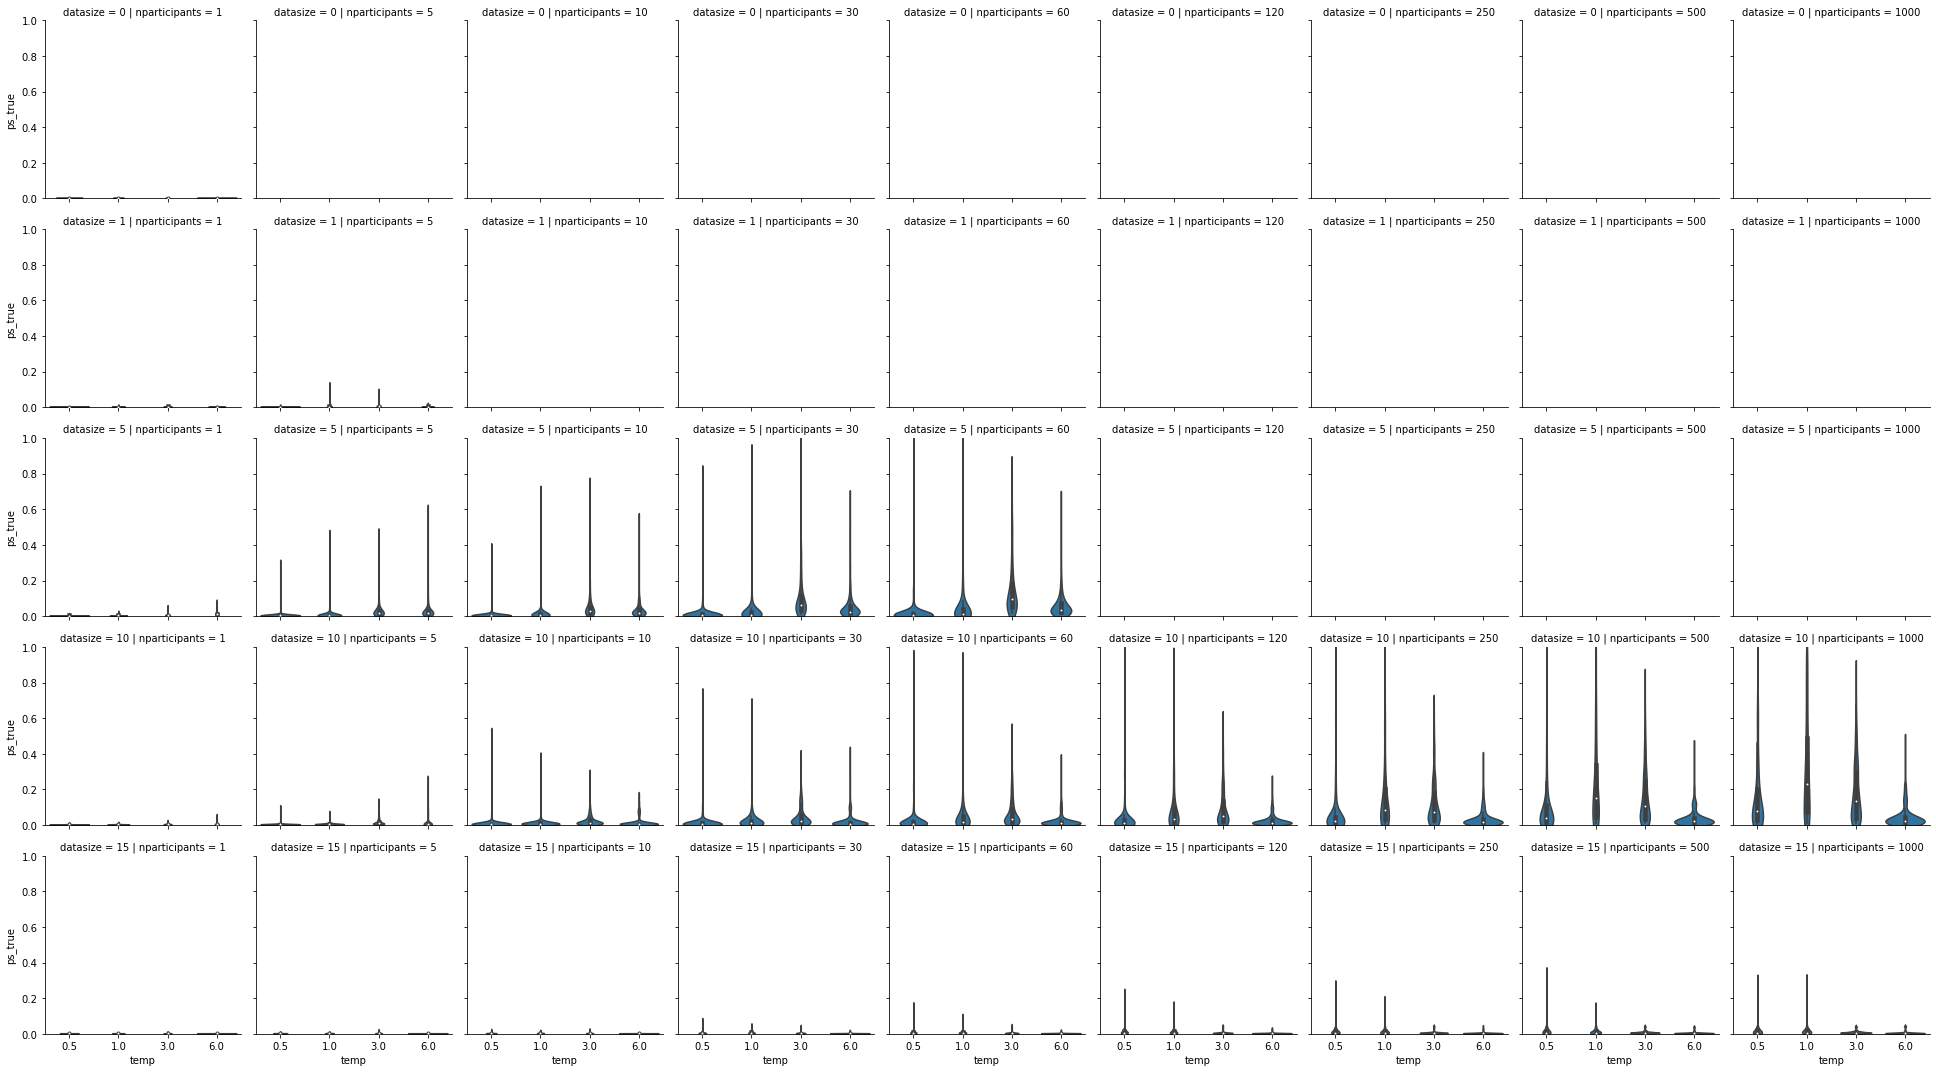

In [71]:
g = sns.FacetGrid(
    df,
    row='datasize',
    col='nparticipants',
    ylim=(0,1)
)

g.map(
    sns.violinplot, 'temp', 'ps_true'
)
plt.show()

## Look back at boolean formula minimiztion data

In [9]:
import sqlite3 as sql

In [11]:
db_path = '/Users/faust/Desktop/neuralNetsLoT/db_numprop-4_nestlim-100.db'
con = sql.connect(db_path)
cur = con.cursor()

In [107]:
p = 'SELECT O,A,N,C,B,X,NA,NOR,NC,category,length FROM data'
cur.execute(p)
df_complete = cur.fetchall()

In [97]:
p = 'SELECT * FROM data LIMIT 100'
cur.execute(p)
df_sub = cur.fetchall()

In [13]:
p = 'SELECT DISTINCT O,A,N,C,B,X,NA,NOR,NC FROM data'
cur.execute(p)
df_unique = cur.fetchall()

In [104]:
p = (
    'SELECT * FROM data '
    'WHERE '
    'O = 0 AND '
    'A = 0 AND '
    'N = 1 AND '
    'C = 1 AND '
    'B = 0 AND '
    'X = 0 AND '
    'NA = 0 AND '
    'NOR = 0 AND '
    'NC = 0 '
)
cur.execute(p)
df_N_C = cur.fetchall()

In [105]:
p = (
    'SELECT * FROM data '
    'WHERE '
    'O = 0 AND '
    'A = 0 AND '
    'N = 1 AND '
    'C = 0 AND '
    'B = 0 AND '
    'X = 0 AND '
    'NA = 0 AND '
    'NOR = 0 AND '
    'NC = 1 '
)
cur.execute(p)
df_N_NC = cur.fetchall()

In [110]:
df_N_C

[(0, 0, 1, 1, 0, 0, 0, 0, 0, 65280, 0, 'p'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 61680, 0, 'q'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 52428, 0, 'r'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 43690, 0, 's'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 255, 1, 'N(p)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 3855, 1, 'N(q)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 13107, 1, 'N(r)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 21845, 1, 'N(s)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 65535, 1, 'C(p,p)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 61695, 1, 'C(p,q)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 52479, 1, 'C(p,r)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 43775, 1, 'C(p,s)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 65295, 1, 'C(q,p)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 53199, 1, 'C(q,r)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 44975, 1, 'C(q,s)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 65331, 1, 'C(r,p)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 62451, 1, 'C(r,q)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 48059, 1, 'C(r,s)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 65365, 1, 'C(s,p)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 62965, 1, 'C(s,q)'),
 (0, 0, 1, 1, 0, 0, 0, 0, 0, 56

In [121]:
N_C = np.array([a[9:11] for a in df_N_C])
N_C_formulas = np.array([a[11] for a in df_N_C])

In [122]:
N_C_formulas[np.argsort(N_C[:,0])]

array(['N(C(p,p))', 'N(C(N(p),C(N(q),C(N(r),s))))',
       'N(C(s,C(N(p),C(N(q),r))))', ..., 'C(s,C(N(p),C(N(q),r)))',
       'C(N(p),C(N(q),C(N(r),s)))', 'C(p,p)'], dtype='<U103')

In [123]:
N_NC = np.array([a[9:11] for a in df_N_NC])
N_NC_formulas = np.array([a[11] for a in df_N_NC])

In [124]:
N_NC_formulas[np.argsort(N_NC[:,0])]

array(['NC(p,p)', 'NC(NC(NC(N(p),q),r),s)', 'NC(NC(NC(s,p),q),r)', ...,
       'N(NC(NC(NC(s,p),q),r))', 'N(NC(NC(NC(N(p),q),r),s))',
       'N(NC(p,p))'], dtype='<U121')

In [132]:
# the two systems have the same minimal formulas (for dual categories)
np.all(np.sort(N_NC[:,1])==np.sort(N_C[:,1]))

True

In [172]:
N_C_categories = np.array(list(map(number_to_category, N_C[:,0])))
N_NC_categories = np.array(list(map(number_to_category, N_NC[:,0])))

In [168]:
np.column_stack((dual_category(N_C_categories),N_C[:,1]))

array([[ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  1, ...,  1,  0, 22],
       [ 0,  0,  0, ...,  0,  0, 22],
       [ 0,  1,  1, ...,  1,  1, 22]])

Check that every category in N_NC has the same minimal description length as the corresponding dual category in N_C

In [184]:
correspondence = []
for i, row in enumerate(dual_category(N_C_categories)):
    # for each category in N_NC, 
    # the index of the corresponding dual category in N_C
    index = np.argwhere(np.all(row==N_NC_categories, axis=1))[0,0]
    correspondence.append(N_NC[i,1]==N_C[index,1])
# this is True
all(correspondence)

In [16]:
LoTs[lengths[:,0]!=-1]

O      A      N      C      B      X     NA    NOR     NC
3    False  False  False  False  False  False  False   True   True
4    False  False  False  False  False  False   True  False  False
5    False  False  False  False  False  False   True  False   True
6    False  False  False  False  False  False   True   True  False
7    False  False  False  False  False  False   True   True   True
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
507   True   True   True   True   True   True  False   True   True
508   True   True   True   True   True   True   True  False  False
509   True   True   True   True   True   True   True  False   True
510   True   True   True   True   True   True   True   True  False
511   True   True   True   True   True   True   True   True   True

[419 rows x 9 columns]

In [ ]:
np.unique(np.array(df)[:9], axis=0)

In [507]:
sys.path.append("../booleanMinimization")

In [508]:
from utilities import calculate_all_inventories
from operators import OP_DICT, PROP_DICT

0b1100
0b1010


In [513]:
%autoreload
all_inventories = calculate_all_inventories(
    OP_DICT.keys(), PROP_DICT.keys()
)

468


In [510]:
len(all_inventories)

419

In [511]:
all_inventories

[['NA'],
 ['N', 'O'],
 ['NA', 'O'],
 ['NOR', 'O'],
 ['C', 'N'],
 ['N', 'NA'],
 ['N', 'NC'],
 ['C', 'NA'],
 ['C', 'NOR'],
 ['C', 'NC'],
 ['B', 'NA'],
 ['B', 'NOR'],
 ['B', 'NC'],
 ['NA', 'NOR'],
 ['NA', 'NC'],
 ['NC', 'NOR'],
 ['A', 'N', 'O'],
 ['A', 'NA', 'O'],
 ['C', 'N', 'O'],
 ['B', 'N', 'O'],
 ['N', 'O', 'X'],
 ['N', 'NA', 'O'],
 ['N', 'NOR', 'O'],
 ['N', 'NC', 'O'],
 ['C', 'NA', 'O'],
 ['C', 'NOR', 'O'],
 ['C', 'NC', 'O'],
 ['B', 'NA', 'O'],
 ['B', 'NOR', 'O'],
 ['B', 'NC', 'O'],
 ['NA', 'O', 'X'],
 ['NOR', 'O', 'X'],
 ['NA', 'NOR', 'O'],
 ['NA', 'NC', 'O'],
 ['NC', 'NOR', 'O'],
 ['A', 'C', 'N'],
 ['A', 'N', 'NC'],
 ['A', 'C', 'NA'],
 ['A', 'C', 'NOR'],
 ['A', 'C', 'NC'],
 ['A', 'B', 'NC'],
 ['A', 'NA', 'NC'],
 ['A', 'NC', 'NOR'],
 ['B', 'C', 'N'],
 ['C', 'N', 'X'],
 ['C', 'N', 'NA'],
 ['C', 'N', 'NOR'],
 ['C', 'N', 'NC'],
 ['B', 'N', 'NA'],
 ['B', 'N', 'NOR'],
 ['B', 'N', 'NC'],
 ['N', 'NC', 'X'],
 ['N', 'NA', 'NOR'],
 ['N', 'NA', 'NC'],
 ['N', 'NC', 'NOR'],
 ['B', 'C', 'NA'],
 [

In [187]:
N_NC[:5]

array([[65280,     0],
       [61680,     0],
       [52428,     0],
       [43690,     0],
       [  255,     1]])

In [192]:
np.array(list(map(number_to_category, [65280, 61680, 52428, 43690]))).T

array([[1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 0],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

# Dimensionality reduction on the space of LoTs

TODO: 
- Is dimensionality reduction explained by how many operators LoTs have? 
- Given an LoT, does presenting specific objects help in reconstructing the true LoT?

In [270]:
from sklearn.decomposition import PCA

In [272]:
lengths_unique, LoTs_unique = prepare_arrays(lengths, LoTs.values)

In [273]:
lengths_unique.shape

(306, 65536)

In [274]:
from mpl_toolkits.mplot3d import Axes3D

[0.91604376 0.02569484]


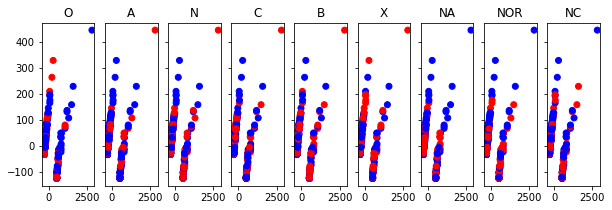

In [102]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(lengths_unique)
print(pca.explained_variance_ratio_)
fig, axes = plt.subplots(1,9, sharey=True, figsize=(10,3))
for ax, name, has_operator in zip(axes, LoTs.columns, LoTs_unique.T):
    ax.scatter(
        *X_pca.T, 
        c=np.where(has_operator, 'r', 'b')
    )
    ax.set_title(name)
plt.show()

[0.91604376 0.02569484 0.00772803]


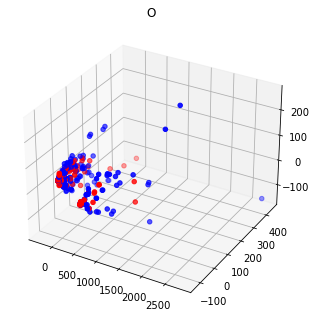

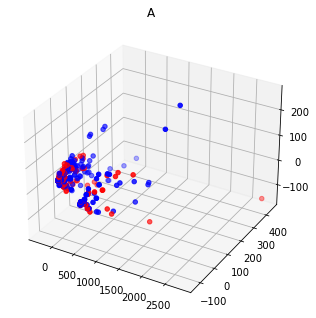

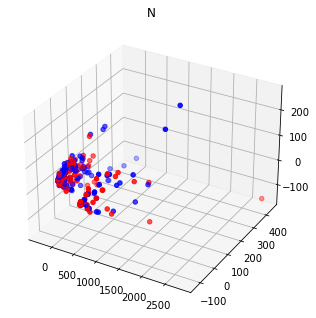

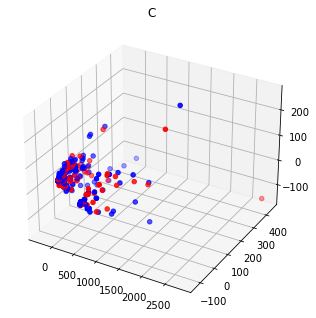

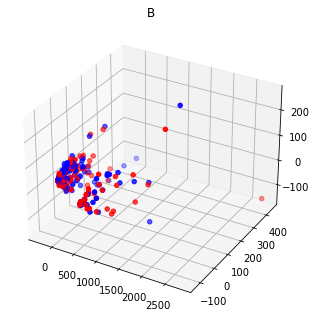

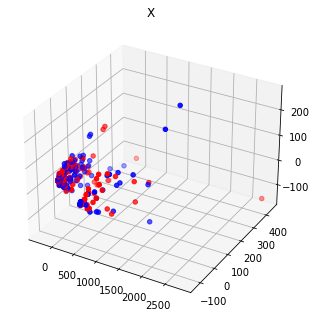

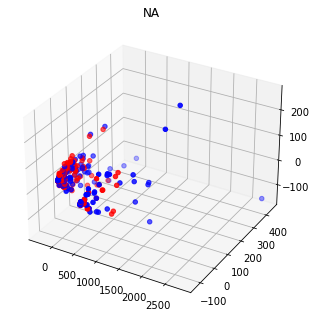

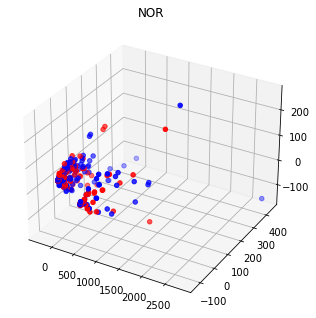

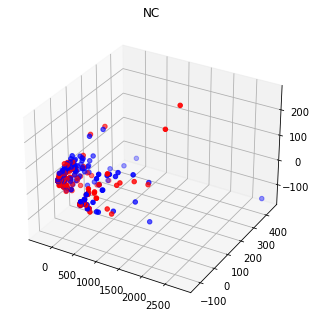

In [101]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(lengths_unique)
print(pca.explained_variance_ratio_)
for name, has_operator in zip(LoTs.columns, LoTs_unique.T):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(
        *X_pca.T, 
        c=np.where(has_operator, 'r', 'b')
    )
    ax.set_title(name)
    plt.show()

In order to explain 99% of the variance, a space with 38 dimensions is enough

In [275]:
pca = PCA(
    n_components=0.99,
    svd_solver='full'
)
X_pca = pca.fit_transform(lengths_unique)

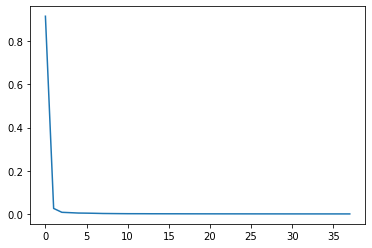

In [105]:
plt.plot(pca.explained_variance_ratio_)

In [42]:
# with 38 dimensions, we explain 99% of the variance!
X_pca.shape

(306, 38)

In [116]:
# expected probability of true LoT, for each LoT
true_LoT_prob = np.diag(np.exp(results).std(1))

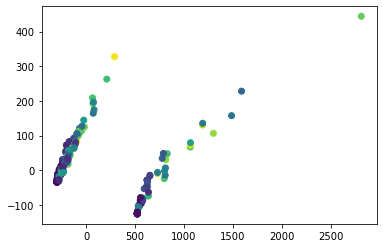

In [118]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(lengths_unique)
plt.scatter(
    *X_pca.T, 
    c=true_LoT_prob
)
plt.show()

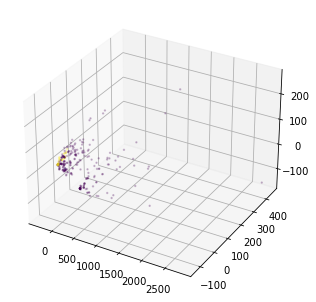

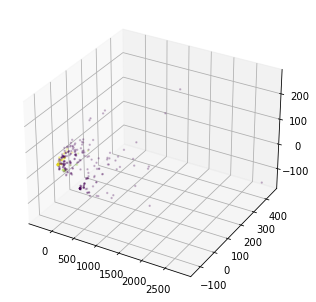

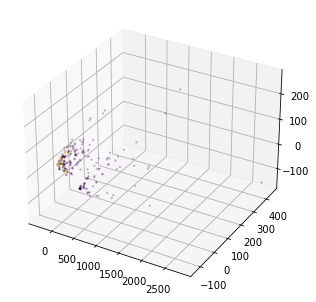

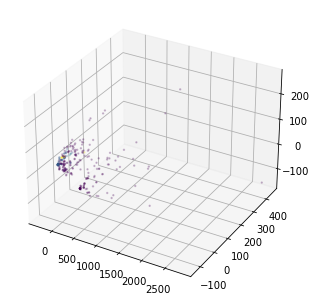

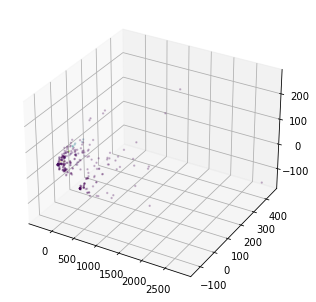

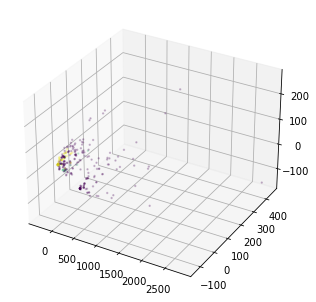

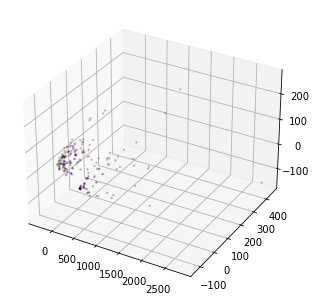

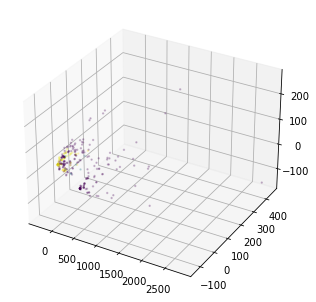

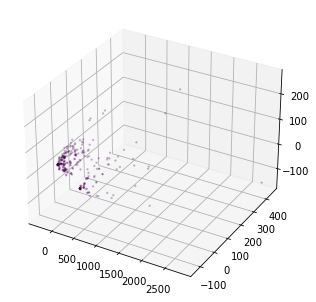

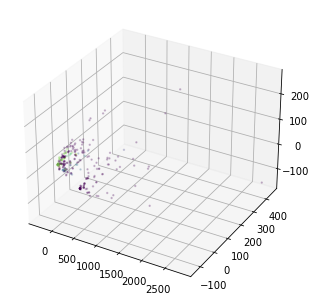

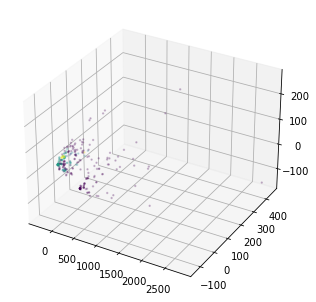

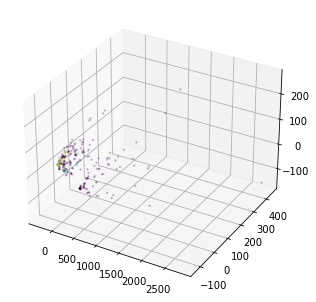

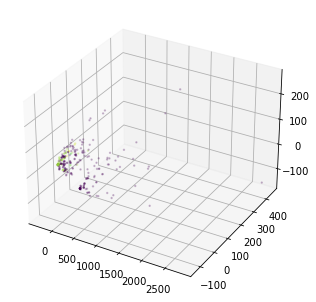

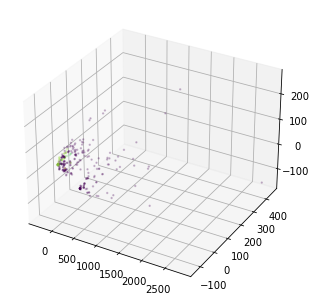

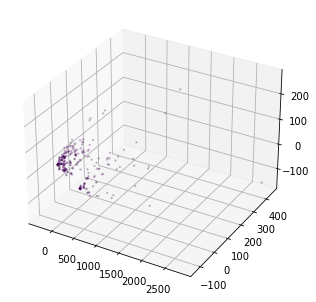

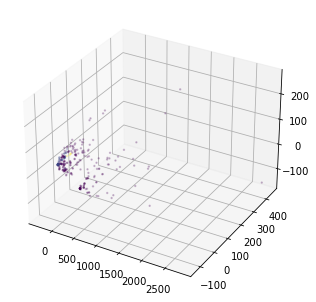

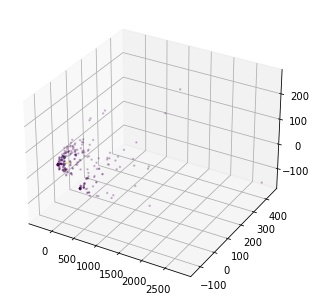

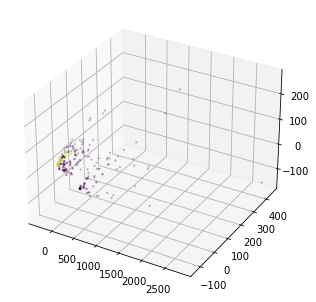

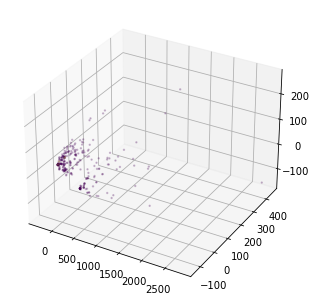

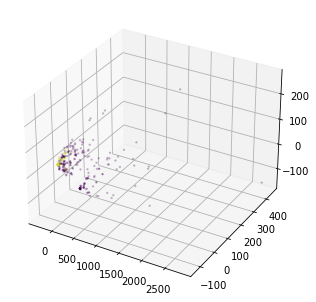

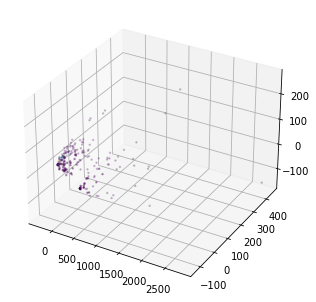

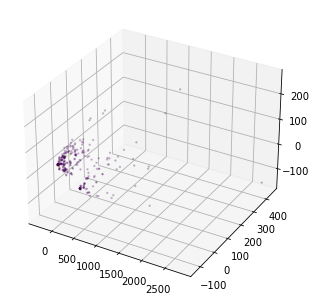

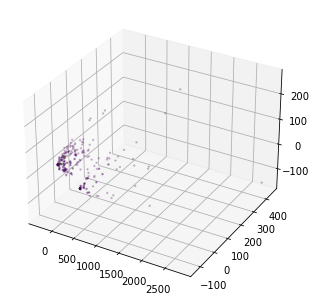

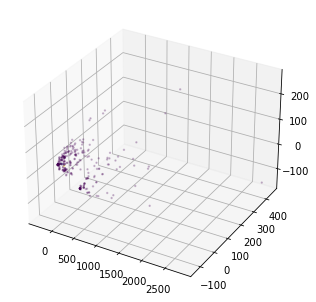

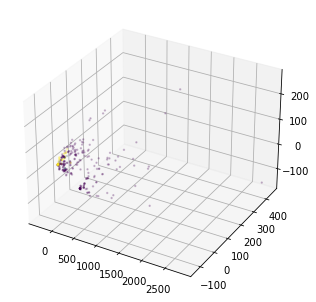

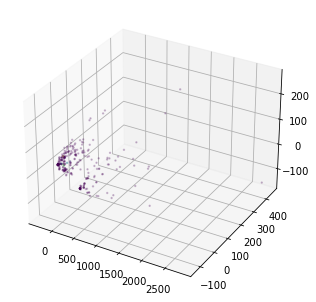

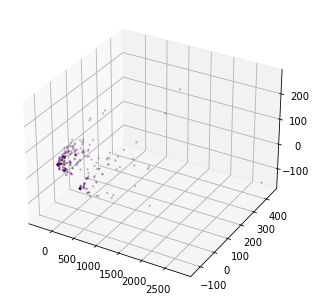

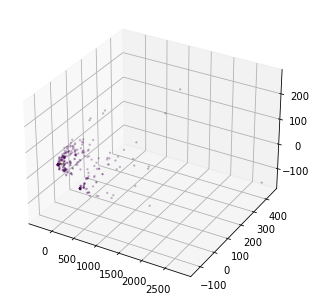

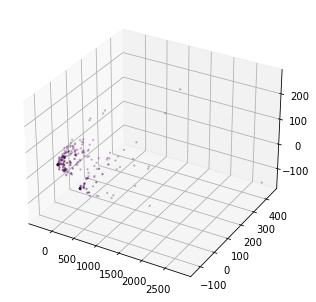

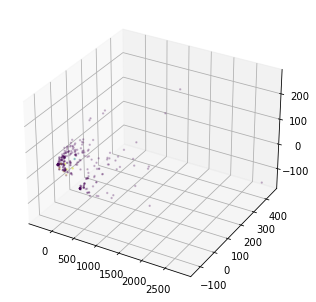

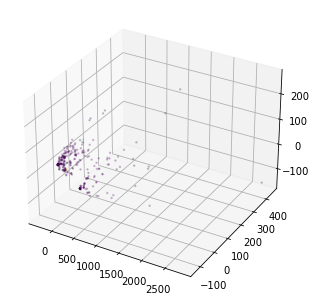

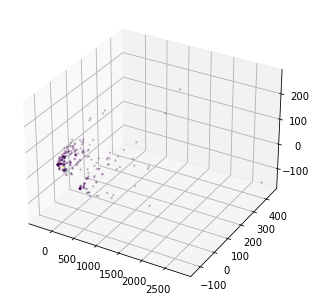

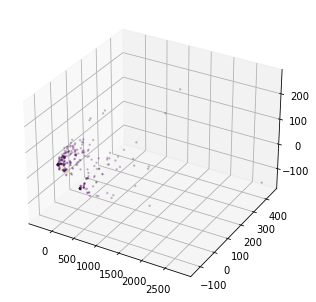

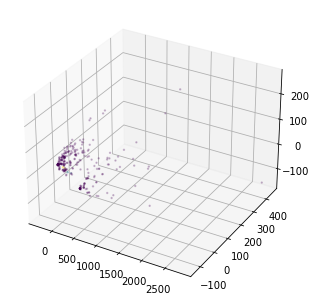

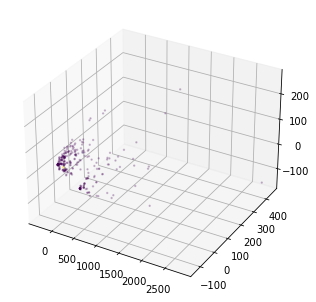

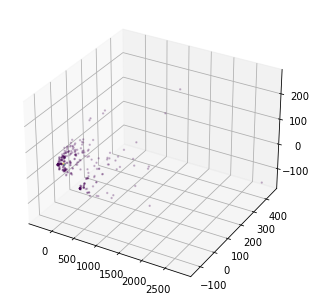

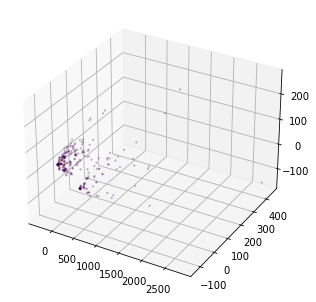

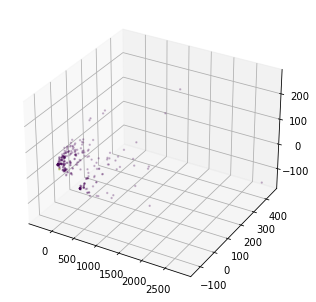

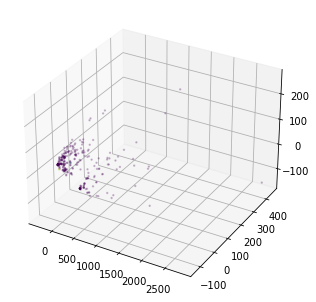

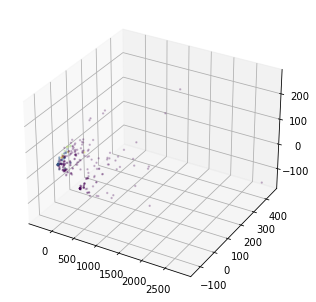

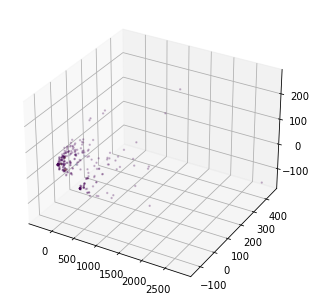

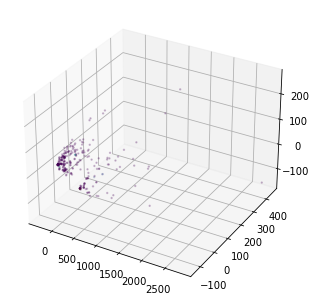

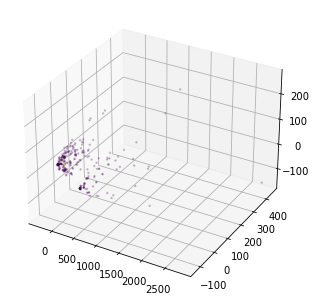

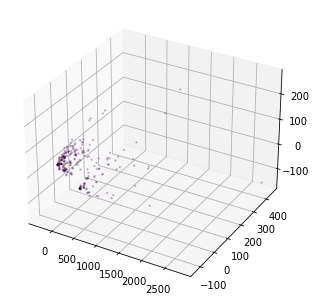

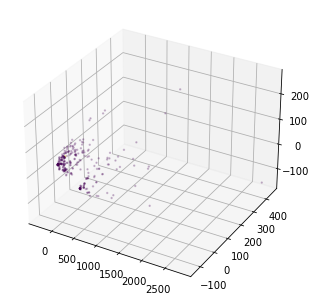

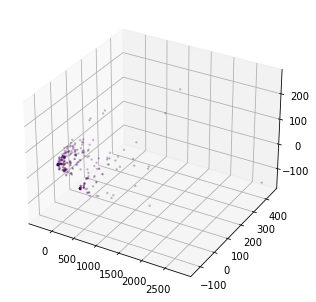

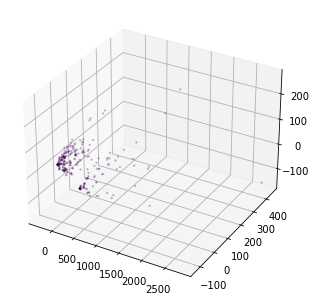

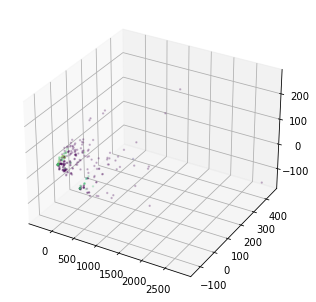

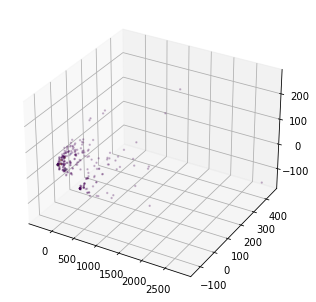

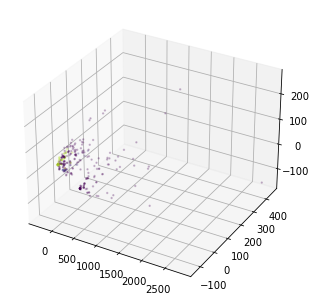

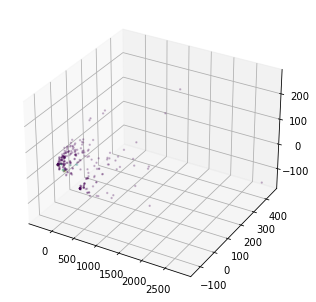

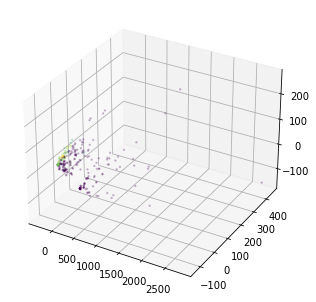

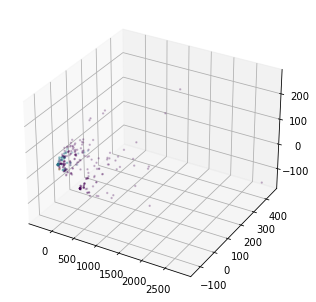

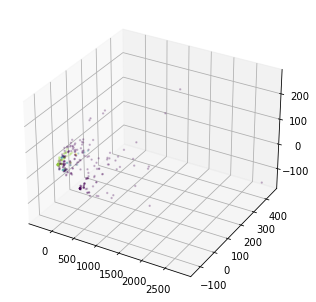

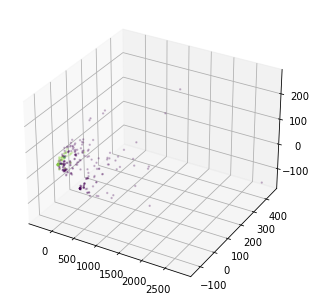

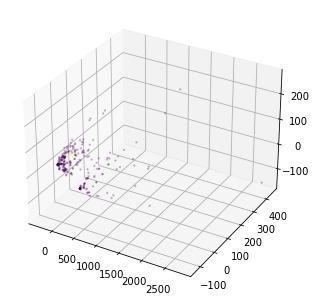

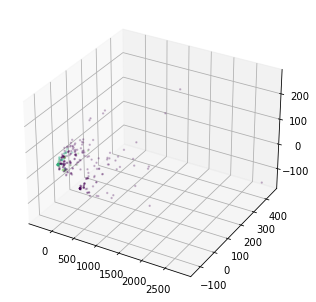

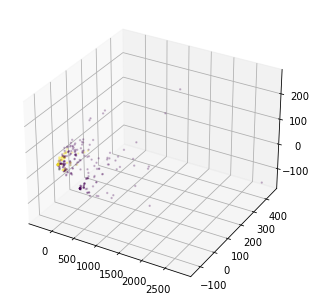

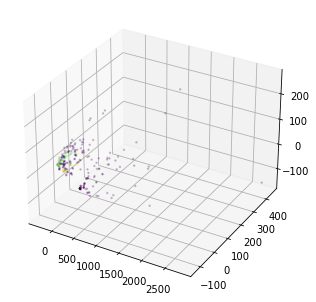

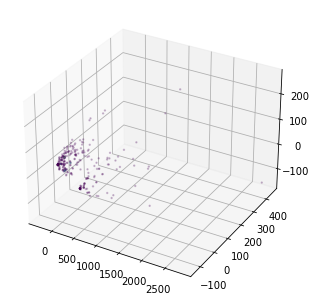

KeyboardInterrupt: 

In [276]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(lengths_unique)
# shape of results is (true lot, experiment, inferred lot)
for LoTs_probs in np.exp(results[:,0]):
#     plt.scatter(
#         *X_pca[argorder].T, 
#         c=LoTs_probs[argorder],
#         s=2
#     )
#     plt.show()
    argorder = np.argsort(LoTs_probs)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(
        *X_pca[argorder].T, 
        c=LoTs_probs[argorder],
        s=2,
        alpha=0.2
    )
    plt.show()

# Test optimal Bayesian design

In [21]:
from importlib import reload
reload(functions)
from functions import *

In [17]:
with open(
        '/mnt/c/Users/faust/Documents/LoTNeuralNets/ANN_complexity/data/complete_lengths.npy',
        'rb') as openfile:
    lengths_full = np.load(openfile)

In [18]:
NUM_PROPERTIES = 4
LoTs_full = LoT_indices_to_operators()
argsort_by_N = LoTs_full['N'].argsort()
# lengths_full has the lengths for ALL functionally complete LoTs.
# re-order so that all first part of the array is when N is False
# which means that in the reduced array all the cases where 
# there are two LoTs, one with and one without N,
# the one without N is the one that appears in the reduced version
lengths, LoTs = functions.prepare_arrays(
    lengths_full[argsort_by_N], 
    LoTs_full.iloc[argsort_by_N].values
)
print('Prepared the lengths and LoTs arrays')

categories = np.array([
    [int(a) for a in f'{n:0{2**NUM_PROPERTIES}b}']
    for n in range(0, 2**(2**NUM_PROPERTIES))
])

(476,)
Prepared the lengths and LoTs arrays


In [19]:
LoTs.shape

(358, 9)

In [ ]:
np.savez_compressed(

In [22]:
_, logp_LoT_given_behaviour, history = calculate_logp_LoT_given_behaviour_dynamic(
    lengths=lengths, 
    LoTs=LoTs, 
    categories=categories, 
    n_participants=200, 
    temp=5., 
    index_true_LoT=3,
    optional_stopping=True
)

/mnt/c/Users/faust/Dropbox/Amsterdam/LoT_project/bayesianAgents/functions.py:98: RuntimeWarning: invalid value encountered in subtract
  return np.log(np.sum(np.exp(X-alpha), axis=axis, keepdims=True)) + alpha
/mnt/c/Users/faust/Dropbox/Amsterdam/LoT_project/bayesianAgents/functions.py:514: RuntimeWarning: invalid value encountered in log
  logp_no_given_LoT = np.log(


Done with participant  0


/mnt/c/Users/faust/Dropbox/Amsterdam/LoT_project/bayesianAgents/functions.py:514: RuntimeWarning: divide by zero encountered in log
  logp_no_given_LoT = np.log(


Done with participant  1
Done with participant  2
Done with participant  3
Done with participant  4
Done with participant  5
Done with participant  6
Done with participant  7
Done with participant  8
Done with participant  9
Done with participant  10
Final P max, LoT max:  3 0.9815657154858272 



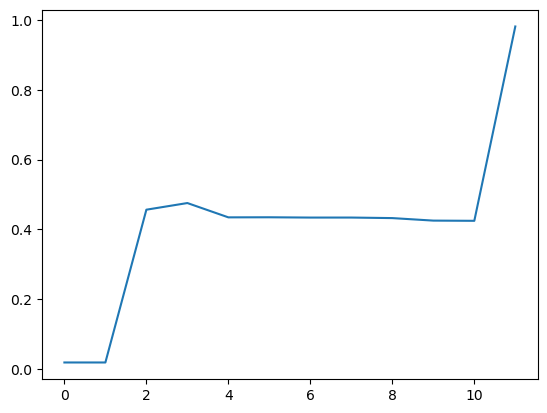

In [31]:
plt.plot(np.exp(history)[:,3])

In [150]:
LoTs[3]

array([ True,  True, False,  True, False,  True, False,  True,  True])

In [151]:
LoTs[317]

array([ True, False,  True,  True,  True, False, False, False, False])

In [155]:
np.unique(lengths[3] - lengths[317], return_counts=True)

(array([-3, -2, -1,  0,  1], dtype=int32),
 array([  205,  9557, 40242, 15504,    28]))

In [140]:
LoTs.shape

(358, 9)

In [137]:
am = np.argmax(logp_LoT_given_behaviour)
print(am)
print(np.exp(logp_LoT_given_behaviour[am]))
print(LoTs[[60, am]])

60
0.5279583921697635
[[ True  True False False False  True False  True False]
 [ True  True False False False  True False  True False]]


In [138]:
np.exp(logp_LoT_given_behaviour)[60]

0.5279583921697635

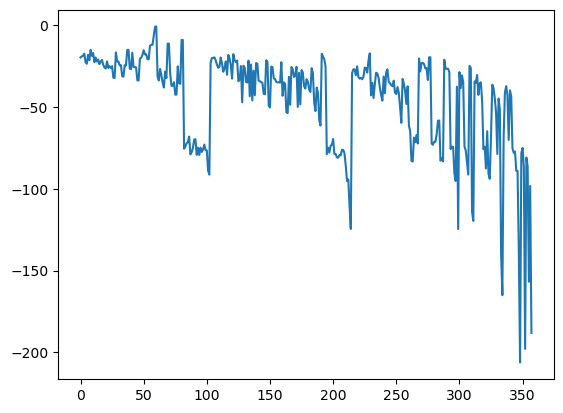

In [139]:
plt.plot(logp_LoT_given_behaviour)
# plt.axvline(60)